In [1]:
import numpy as np
import statsmodels.api as sm
from numpy.random import Generator, PCG64

rg = Generator(PCG64(1234))
# Your weights
w = np.array([3, 1, -2, 0.8, 1.2, -1.2, 6, 1.2, 1.1])   # shape (p,)
b = 0.1              # scalar intercept
num_rows = 1000
columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']
all_data= []
data_list = []

for i in range(num_rows):
    np.random.seed(42+i)
    p1 = np.random.normal(loc=0, scale=1)
    p2 = np.random.normal(loc=-2, scale=0.2)
    p3 = np.random.normal(loc=10, scale=2)
    p4 = np.random.poisson(lam=7)
    p5 = np.random.poisson(lam=2)
    p6 = np.random.gamma(shape=2, scale=1)
    p7 = np.random.gamma(shape=3, scale=1)
    p8 = np.random.gamma(shape=0.5, scale=1)
    p9 = p2*np.random.gamma(shape=1, scale=1)
    values = [p1, p2, p3, p4, p5, p6, p7, p8, p9]
    # Generate Xi values
    all_data.append(dict(zip(columns,values)))
    data_list.append(values)

# New data to score
X_new = data_list                    # shape (n, p)
X_new_c = sm.add_constant(X_new) # adds intercept column as first col

# Build a dummy GLM just so we can use its predict; no fitting
p = X_new_c.shape[1]
glm = sm.GLM(endog=np.zeros(1), exog=np.zeros((1, p)), family=sm.families.Binomial())

beta = np.r_[b, w]               # [intercept, w...], shape (p,)
proba = glm.predict(params=beta, exog=X_new_c)  # shape (n,)
# proba is P(y=1|x); use (1 - proba) for class 0


In [40]:
# ------------ DATA GENERATION --------------



import numpy as np
import statsmodels.api as sm
from numpy.random import Generator, PCG64
import zlib

rg = Generator(PCG64(1234))
# Your weights
w = np.array([3, 1, -2, 0.8, 1.2, -1.2, 6, 1.2, 1.1])   # shape (p,)
b = 0.1              # scalar intercept
num_rows = 1000
seed = 42
columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']
all_data= []
data_list = []

hashed_seed = int(zlib.crc32(seed))
for i in range(num_rows):
    np.random.seed(42+i)
    p1 = np.random.normal(loc=0, scale=1)
    p2 = np.random.normal(loc=-2, scale=0.2)
    p3 = np.random.normal(loc=10, scale=2)
    p4 = np.random.poisson(lam=7)
    p5 = np.random.poisson(lam=2)
    p6 = np.random.gamma(shape=2, scale=1)
    p7 = np.random.gamma(shape=3, scale=1)
    p8 = np.random.gamma(shape=0.5, scale=1)
    p9 = p2*np.random.gamma(shape=1, scale=1)
    values = [p1, p2, p3, p4, p5, p6, p7, p8, p9]
    hashed_seed = int(zlib.crc32((hashed_seed+1).to_bytes(8, "big")))
    # Generate Xi values
    all_data.append(dict(zip(columns,values)))
    data_list.append(values)

# New data to score
X_new = data_list                    # shape (n, p)
X_new_c = sm.add_constant(X_new) # adds intercept column as first col

# Build a dummy GLM just so we can use its predict; no fitting
p = X_new_c.shape[1]
glm = sm.GLM(endog=np.zeros(1), exog=np.zeros((1, p)), family=sm.families.Binomial())

beta = np.r_[b, w]               # [intercept, w...], shape (p,)
proba = glm.predict(params=beta, exog=X_new_c)  # shape (n,)
# proba is P(y=1|x); use (1 - proba) for class 0


TypeError: a bytes-like object is required, not 'int'

In [360]:
import zlib
import pandas as pd
seed = 49
n_features = 9
n_classes = 4                          # number of classes
n_samples = 100000
cov_beta = [[0.3, 1.8, 0.5, -0.8, -1.0, 0.1, 0, -1.2, 0.1],
             [-6, -4.2, -1, -0.9, 0.9, -7, -3.1, 0.7, -0.9],
             [-3, -1.2, 2, -1.1, 1.2, 0.9, 0.1, 0.2, 1.2]]
intercepts = [0.1, -2.4, 0.7]

beta_hash = int(zlib.crc32(np.array(cov_beta + intercepts).tobytes()))
hashed_seed = int(zlib.crc32((seed*n_features).to_bytes(8, "big")))
X = np.empty((n_samples, n_features))
dist_types = []
np.set_printoptions(legacy='1.25')
for i in range(0,n_features): 
    hashed_seed = int(zlib.crc32((hashed_seed+1).to_bytes(8, "big")))
    dist_type, new_col = generate_column(hashed_seed, n_samples)
    X[:, i] = new_col
    print(f"Col{i+1}: {dist_type}")
    dist_types.append(dist_type)
X_bytes = X.tobytes()
int(zlib.crc32(X_bytes))

cov_beta = [[0.3, 1.8, 0.5, -0.8, -1.0, 0.1, 0, -1.2, 0.1],
             [-6, -4.2, -1, -0.9, 0.9, -7, -3.1, 0.7, -0.9],
             [-3, -1.2, 2, -1.1, 1.2, 0.9, 0.1, 0.2, 1.2]]
intercepts = [0.1, -2.4, 0.7]
beta_hash = int(zlib.crc32(np.array(cov_beta + intercepts).tobytes()))
w = np.array(cov_beta)  

b = np.array(intercepts)[None, :].T            # scalar intercept

X_new = X                    # shape (n, p)
X_new_c = sm.add_constant(X_new) # adds intercept column as first col

# Build a dummy GLM just so we can use its predict; no fitting
p = X_new_c.shape[1]
glm = sm.GLM(endog=np.arange(n_classes), exog=np.zeros((n_classes, X_new_c.shape[1])))

beta = np.hstack([b, w]).T          # shape (p+1, K-1)
S = glm.predict(params=beta, exog=X_new_c)  # shape (n,)

row_max = np.maximum(0.0, S.max(axis=1, keepdims=True))  # include baseline (0) in the max
exp_non_baseline   = np.exp(S - row_max)                             # non-baseline terms
base    = np.exp(-row_max)                                # baseline term (exp(0 - row_max))
denom   = base + exp_non_baseline.sum(axis=1, keepdims=True)

P_nonbase = exp_non_baseline / denom
P_base    = base  / denom
proba     = np.concatenate([P_base, P_nonbase], axis=1)   
y = proba.argmax(axis=1)

full_dataset = np.column_stack((y, X))
X_bytes = X.tobytes()
full_dataset_hash = int(zlib.crc32(full_dataset.tobytes()))
x_hash = int(zlib.crc32(X.tobytes()))
y_hash = int(zlib.crc32(y.tobytes()))
counts = np.bincount(y)
freq   = counts / counts.sum()

name = "mlr" + f"_class={n_classes}"+ f"_features={n_features}" + f"_seed={seed}" + f"_samples={n_samples}" + "_" + str(beta_hash) 
id = int(zlib.crc32(name.encode()))




Col1: gamma(0.1, 1.23)
Col2: poisson(1.84,)
Col3: gamma(2.33, 0.22)
Col4: normal(1.76, 1.6)
Col5: poisson(1.91,)
Col6: laplace(-1.49, 0.6)
Col7: gamma(2.28, 0.2)
Col8: normal(1.56, 0.25)
Col9: poisson(1.04,)


In [430]:
# Given X from above cell, compute class probabilities for n_classes and covariates


n_classes = 5                          # number of classes
cov_beta = [[0.3, -1.8, 2.5, 0.8, 1.0, 0.1, 0, 1.1, 2.1],
             [-3, -4.2, -2, 1, 0.3, -0.1, 0.05, -0.4, -1.9],
             [0.1, 1.2, 2, -1.3, 1.2, 0.9, 0.2, 0.2, 1.2],
             [2, 2.2, 2, -0.9, 0.9, -7, 3.1, 0.7, -0.9]]
intercepts = [0.1, -2.4, 0.7, 1.5]
w = np.array(cov_beta)  

b = np.array(intercepts)[None, :].T            # scalar intercept

X_new = X                    # shape (n, p)
X_new_c = sm.add_constant(X_new) # adds intercept column as first col

# Build a dummy GLM just so we can use its predict; no fitting
p = X_new_c.shape[1]
glm = sm.GLM(endog=np.arange(n_classes), exog=np.zeros((n_classes, X_new_c.shape[1])))

beta = np.hstack([b, w]).T          # shape (p+1, K-1)
S = glm.predict(params=beta, exog=X_new_c)  # shape (n,)

row_max = np.maximum(0.0, S.max(axis=1, keepdims=True))  # include baseline (0) in the max
exp_non_baseline   = np.exp(S - row_max)                             # non-baseline terms
base    = np.exp(-row_max)                                # baseline term (exp(0 - row_max))
denom   = base + exp_non_baseline.sum(axis=1, keepdims=True)

P_nonbase = exp_non_baseline / denom
P_base    = base  / denom
proba     = np.concatenate([P_base, P_nonbase], axis=1)   
y_hat = proba.argmax(axis=1)    
y = y_hat
counts = np.bincount(y_hat, minlength=4)      # a is your 1D array of 0/1/2/3
freq   = counts / counts.sum()
print(counts)
print(freq)


[13937 27704 22460 14409 21490]
[0.13937 0.27704 0.2246  0.14409 0.2149 ]


In [ ]:
import numpy as np
import statsmodels.api as sm
from numpy.random import Generator, PCG64

rg = Generator(PCG64(1234))
# Your weights
w = np.array([3, 1, -2, 0.8, 1.2, -1.2, 6, 1.2, 1.1])   # shape (p,)
b = 0.1              # scalar intercept
num_rows = 1000
columns = ['p1', 'p2', 'p3', 'p4', 'p5', 'p6', 'p7', 'p8', 'p9']
all_data= []
data_list = []

for i in range(num_rows):
    np.random.seed(42+i)
    p1 = np.random.normal(loc=0, scale=1)
    p2 = np.random.normal(loc=-2, scale=0.2)
    p3 = np.random.normal(loc=10, scale=2)
    p4 = np.random.poisson(lam=7)
    p5 = np.random.poisson(lam=2)
    p6 = np.random.gamma(shape=2, scale=1)
    p7 = np.random.gamma(shape=3, scale=1)
    p8 = np.random.gamma(shape=0.5, scale=1)
    p9 = p2*np.random.gamma(shape=1, scale=1)
    values = [p1, p2, p3, p4, p5, p6, p7, p8, p9]
    # Generate Xi values
    all_data.append(dict(zip(columns,values)))
    data_list.append(values)

# New data to score
X_new = data_list                    # shape (n, p)
X_new_c = sm.add_constant(X_new) # adds intercept column as first col

# Build a dummy GLM just so we can use its predict; no fitting
p = X_new_c.shape[1]
glm = sm.GLM(endog=np.zeros(1), exog=np.zeros((1, p)), family=sm.families.Binomial())

beta = np.r_[b, w]               # [intercept, w...], shape (p,)
proba = glm.predict(params=beta, exog=X_new_c)  # shape (n,)
# proba is P(y=1|x); use (1 - proba) for class 0


In [454]:
generate_column(8, 10, new_col=new_col)

normal_binomial(0.89,) [-13.61  -3.52 -23.13  -1.89  -9.57   8.94   9.57  13.92   7.67  -0.53]


('normal_binomial(0.89,)',
 array([-13.61,  -3.52, -23.13,  -1.89,  -9.57,   8.94,   9.57,  13.92,
          7.67,  -0.53]))

In [453]:
generate_column(6, 10, new_col=new_col)

laplace(1.78, 0.6) [ 1.6   4.    1.96  2.03  1.53  2.05  0.93  0.41  2.5  -0.65]


('laplace(1.78, 0.6)',
 array([ 1.6 ,  4.  ,  1.96,  2.03,  1.53,  2.05,  0.93,  0.41,  2.5 ,
        -0.65]))

In [19]:
rg = Generator(PCG64(80))
n_samples = 5
p = 0.5
rg.normal(loc=0, scale=1, size=n_samples) * rg.binomial(1, p, size=n_samples)

array([ 0.        , -0.41124328, -0.58032452, -1.19944942, -0.        ])

In [52]:
p=[0.1, 0.05, 0.1, 0.15, 0.15, 0.1, 0.05, 0.1]
k=0
for i in p: 
    k += i
k

0.8

In [ ]:
from numpy.random import Generator, PCG64
import numpy as np
import zlib
import statsmodels.api as sm

def generate_column(hashed_seed, n_samples, new_col=None, extra_conditions=""):
    # Select distribution type randomly between normal, poisson, gamma
    rg = Generator(PCG64(hashed_seed))
    if new_col is not None:
        dist_type = rg.choice(['normal', 'poisson', 'gamma', 'laplace', 'binomial', 'normal_binomial', 'last_square', 'last_binomial'], p=[0.2, 0.05, 0.1, 0.15, 0.15, 0.2, 0.05, 0.1])
        # dist_type = rg.choice(['normal', 'poisson', 'gamma', 'laplace', 'binomial', 'normal_binomial'])
    else:
        dist_type = rg.choice(['normal', 'poisson', 'gamma', 'laplace', 'binomial', 'normal_binomial'], p=[0.3, 0.1, 0.1, 0.2, 0.25, 0.05])
    if "easy_cols" in extra_conditions:
        dist_type = rg.choice(['normal', 'poisson', 'gamma', 'laplace', 'binomial'], p=[0.3, 0.1, 0.15, 0.2, 0.25])

    if dist_type == 'normal':
        # select mean and stddev randomly skewed towards lower values
        mean = rg.normal(loc=0, scale=2)
        stddev = rg.exponential(scale=1)
        params = (np.around(mean,2), np.around(stddev,2))
        samples =  rg.normal(loc=mean, scale=stddev, size=n_samples)
    elif dist_type == 'poisson':
        # select lambda randomly skewed towards lower values and positive
        lam = rg.exponential(scale=2)
        params = (np.around(lam,2),)
        samples = rg.poisson(lam=lam, size=n_samples)
    elif dist_type == 'gamma':
        # select shape and scale randomly skewed towards lower values and positive
        shape = rg.exponential(scale=2)
        scale = rg.exponential(scale=1)
        params = (np.around(shape,2), np.around(scale,2))
        samples = rg.gamma(shape=shape, scale=scale, size=n_samples)
    elif dist_type == 'laplace':
        mean = rg.normal(loc=0, scale=1)
        scale = rg.exponential(scale=1)
        params = (np.around(mean,2), np.around(scale,2))
        samples = rg.laplace(loc=mean, scale=scale, size=n_samples)
    elif dist_type == 'binomial':
        p = rg.uniform(low=0.2, high=0.9, size=None)
        # params = np.around(p,2)
        params = (np.around(p,2),)
        samples = rg.binomial(1, p, size=n_samples)
    elif dist_type == 'normal_binomial':
        p = rg.uniform(low=0.2, high=0.9, size=None)
        params = (np.around(p,2),)
        samples = rg.normal(loc=2, scale=0.2, size=n_samples) * rg.binomial(1, p, size=n_samples)
    elif dist_type == 'last_square':
        params = ""
        samples = new_col ** 2 + rg.normal(loc=0, scale=1)
    elif dist_type == 'last_binomial':
        p = rg.uniform(low=0.2, high=0.9, size=1)
        params = (np.around(p,2),)
        samples = new_col * rg.binomial(1, p, size=n_samples)

    return dist_type + f"{params}", np.around(samples, 2)

def generate_mlr_data(seed, n_features, n_samples, n_classes, cov_beta, intercepts, extra_conditions=""):
    np.set_printoptions(legacy='1.21')
    hashed_seed = int(zlib.crc32((seed*n_features).to_bytes(8, "big")))
    rg = Generator(PCG64(hashed_seed))
    X = np.empty((n_samples, n_features))
    dist_types = []
    new_col = None
    for i in range(0,n_features): 
        hashed_seed = int(zlib.crc32((hashed_seed+1).to_bytes(8, "big")))
        dist_type, new_col = generate_column(hashed_seed, n_samples, new_col, extra_conditions)
        X[:, i] = new_col
        dist_types.append(f"Col{i+1}: {dist_type}")
    w = np.array(cov_beta)
    b = np.array(intercepts)[None, :].T            # scalar intercept
    X_new = X                    # shape (n, p)
    X_new_c = sm.add_constant(X_new) # adds intercept column as first col

    # Build a dummy GLM just so we can use its predict; no fitting
    p = X_new_c.shape[1]
    glm = sm.GLM(endog=np.arange(n_classes), exog=np.zeros((n_classes, X_new_c.shape[1])))
    beta = np.hstack([b, w]).T          # shape (p+1, K-1)
    S = glm.predict(params=beta, exog=X_new_c)  # shape (n,)

    # check if string starts with "add_logit_noise"
    if "add_logit_noise" in extra_conditions:
        sigma = float(extra_conditions.split("=")[1])
        S = S + rg.normal(0.0, sigma, size=S.shape)

    row_max = np.maximum(0.0, S.max(axis=1, keepdims=True))  # include baseline (0) in the max
    exp_non_baseline   = np.exp(S - row_max)                             # non-baseline terms
    base    = np.exp(-row_max)                                # baseline term (exp(0 - row_max))
    denom   = base + exp_non_baseline.sum(axis=1, keepdims=True)

    P_nonbase = exp_non_baseline / denom
    P_base    = base  / denom
    proba     = np.concatenate([P_base, P_nonbase], axis=1)   

    # rg = np.random.default_rng(seed)
    y_hat = np.array([rg.choice(proba.shape[1], p=row) for row in proba])  # shape (10,)
    # y_hat = proba.argmax(axis=1)
    y = y_hat
    counts = np.bincount(y_hat, minlength=n_classes)      
    freq   = counts / counts.sum()
    return X, y, dist_types, proba, freq

def check_hashes(X, y, x_hash, y_hash, full_hash):
    full_dataset = np.column_stack((X, y))
    full_dataset_hash = int(zlib.crc32(full_dataset.tobytes()))
    if int(zlib.crc32(X.tobytes())) != x_hash:
        raise ValueError(f"X hash mismatch: {int(zlib.crc32(X.tobytes()))} != {x_hash}")
    if int(zlib.crc32(y.tobytes())) != y_hash:
        raise ValueError(f"y hash mismatch: {int(zlib.crc32(y.tobytes()))} != {y_hash}")
    if full_dataset_hash != full_hash:
        raise ValueError(f"Full dataset hash mismatch: {full_dataset_hash} != {full_hash}")


In [ ]:
import os
import sqlalchemy as sa
import zlib
import numpy as np
import generate_data as gd
import pandas as pd

seed = 45
n_features = 3
n_classes = 3                          # number of classes
n_samples = 5
cov_beta = [
             [2.1, -5.85, 5.5, 1.5, 4.75, 0.05, -6.7, 2.2], # class 1
             [-5.9, 2.35, 2.7, -4.85, -1.15, 1.22, 5.25, -3.13], # class 2
             [0, 2.12, 1.35, -5.1, 5.85, -3.35, 1., 6.02], # class 3
             [2, -4.17, 3.24, -4.49, -3.402, -2.28, 2.09, 5.19],  # class 4
             [3.55, -3.5, 1.13, -3.25, 0, 1.1, 0.3, -5.08], # class 5
             [-4.05, 1.26, -6.2, -3.5, -1.6, 3.01, -1.05, 2.04]] # class 6

cov_beta = [
             [3.5, 3.85, -1.5, 1.5, 5.75, -2.05, 3.7, 1.2], # class 1
             [-1.9, 2.35, 4.7, -1.85, -2, 2.22, 2.25, 3.13], # class 2
             [0, 2.12, 4.35, -5.1, 5.85, -3.35, 1., 6.02], # class 3
             [3, 2.17, -5.24, 2.49, 2.402, -2.28, 3.09, -2.19],  # class 4
             [3.55, 2.5, -1.13, -3.25, 0, -1.1, 2.3, -6.08], # class 5
             [4.05, 1.26, -5.2, -3.5, 2.6, 2.01, 3.05, 2.04]] # class 6

cov_beta = [
             [4.5, -1.85, -2.5, 4.5, 5.75, -6.05, 1.7, -2.2, -3, 2, -1.5, 1.5, 5.75, 0, 3.7, -3.2], # class 1
             [-2.9, 3.35, -1.7, -1.85, -2, -3.22, 1.25, -2.8, -1.9, 0, 4.7, -3.85, 2, 3.8, -2.25, -4.13], # class 2
             [0, 2.12, 4.35, -1.1, 2.85, -4.35, -1, -0.3, 0, 2.12, 0, -5.1, -2, -3.35, -2.0, -3.02], # class 3
             [3, 2.17, -5.24, 0, 0, -2.28, 3.09, -2.19, 3, 0, -5.24, 2.49, 2.402, -2.28, 2.09, 0],  # class 4
             [0, 2.5, -1.13, -3.25, 0, -1.1, 2.3, -6.08, 3.55, 0, -1.13, -3.25, 0, -1.1, 2.3, 0], # class 5
             [4.05, 1.26, -5.2, -1.5, 2.6, -2.01, 1.7, 2.04, 4.05, 1.26, 0, -3.5, 2.6, 2.01, 1.05, 0 ]] # class 6

cov_beta = [
             [0.01, -0.15, 0.1, -0.03, -0.25, 0.05, 0.25, -0.14], # class 1
             [-0.12, -0.35, -0.25, -0.25, -0.15, -0.22, 0.25, 0.23], # class 2
             [0.25, 0.12, 0.35, -0.1, 0.35, -0.15, 0.25, -0.18], # class 3
             [0.11, -0.17, -0.24, -0.19, -0.102, 0.18, 0.09, -0.19],  # class 4
             [-0.28, 0.26, -0.06, -0.15, -0.32, -0.21, -0.05, -0.45], # class 5
             [0.18, -0.26, -0.16, -0.55, 0.32, -0.1, 0.5, -0.15]] # class 6
cov_beta = [
             [-0.8, 1.85, -2.5, -0.9, 0.25, 0.95, -1.7, -2.2, -1.3, -0.4, 1.5, 0.5, 0.75, 0, 0.7, 0], # class 1
             [-0.9, 1.35, -1.7, -1.85, -2, -3.22, 1.25, -2.8, -1.9, 0, 0.7, -0.85, 2, 0.8, -0.85, 0], # class 2
             [0.1, 0.12, 0.35, -1.1, 0.25, -0.35, 1.5, -0.3, 1.2, -0.12, 0.4, -0.1, -0.2, -0.35, -0.9, 0], # class 3
             [0.8, -0.1, -0.24, -0.5, 0, -0.1, 1.09, -0.3, -1.3, -1.8, -0.24, -0.49, -0.7, -0.28, 0.09, 0],  # class 4
             [-1.4, 1, 0.13, -0.25, 0, -1.1, 1.3, -0.8, 0.55, 0, -0.13, -0.25, 0, -1.1, 0.6, 0]]# class 5


cov_beta = [
             [-1.5, 1.45, 2.5, -1.1, 1.5, 0.75, -3.1, 1.5], # class 1
             [1.3, -2.5, -1.7, -1.85, -2.1, 1.22, 1.25, -4], # class 2
             [-2.1, 1.7, -2.55, 3.1, -2.5, -2.35, -2.5, -2]] # class 3
cov_beta = [
             [1.05, 0.75, 2.5, -1.7], # class 1
             [-2.1, 1.15, 2.9, -3], # class 2
             [1.11, -1.3, -0.5, 1]] # class 3

cov_beta = [
             [-1.5, 2, -2.5, 1.5, 1.75, -2.05, -2.7, -2.2, -1, -2, -1.5, 1.5, -2.75, 0, 3.7, 3.2], # class 1
             [-2.9, 0.35, -1.7, -1.85, -2, -3.22, 1.25, -2.8, -1.9, -3, 0.7, -3.85, 2, 3.8, -3.25, -4.13], # class 2
             [1, 2.12, 1.35, -0.1, -2.85, -0.35, -1, -0.3, 0, 2.12, -1, -5.1, -2, -1.35, -1.0, -3.02]] # class 3

cov_beta = [
             [0, 0.1, 3.5, 0, 0.2, 2.05, -2.6, -1.5, 0, 0, 0, 0, 0, 0, 0, 0], # class 1
             [0, 0.4, -0.7, 0, -3.5, -2.5, 1.25, 0, 0, 0, 0, 0, 0, 0, 0, 0.1]] # class 2

cov_beta = [
             [1.5, 0.75, 2.5], # class 1
             [1.12, 1.3, 0.15]] # class 3


intercepts = [0, 0.9]
beta_hash = int(zlib.crc32((str(cov_beta) + str(intercepts)).encode()))
# cov_beta = np.array(cov_beta)
# intercepts = np.array(intercepts)[None, :].T            # scalar intercept
# np.hstack([cov_beta, intercepts]).T
# extra_conditions = "easy_cols"
extra_conditions = ""
postgres_df = pd.DataFrame()
X, y, dist_types, proba, freq = generate_mlr_data(seed, n_features, n_samples, n_classes, cov_beta, intercepts, extra_conditions=extra_conditions)
print(dist_types)
freq = np.around(freq, 3)
print(freq)
full_dataset = np.column_stack((X, y))
full_dataset_hash = int(zlib.crc32(full_dataset.tobytes()))
x_hash = int(zlib.crc32(X.tobytes()))
y_hash = int(zlib.crc32(y.tobytes()))
name = "mlr" + f"_class={n_classes}"+ f"_features={n_features}" + f"_seed={seed}" + f"_samples={n_samples}" + "_" + str(beta_hash) + extra_conditions
print(int(zlib.crc32(name.encode())))

['Col1: binomial(0.3,)', 'Col2: normal(1.61, 0.28)', 'Col3: binomial(0.87,)']
[0.  0.6 0.4]
4052163667


In [1413]:
import psycopg2
import json 
import pandas as pd
import generate_data as gd
import sqlalchemy as sa
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os

df = pd.DataFrame(X, columns=[f"p{i+1}" for i in range(n_features)])
df['Y'] = y
df.to_clipboard()

model = make_pipeline(
                StandardScaler(),
                LogisticRegression(solver='lbfgs', max_iter=1000))
X_train, X_test, y_train, y_test = train_test_split(df.drop(['Y'], axis=1), df['Y'], test_size=0.2, random_state=seed)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test.tolist(), y_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      6917
           1       0.76      0.83      0.80      6102
           2       0.90      0.87      0.89      6981

    accuracy                           0.80     20000
   macro avg       0.80      0.81      0.80     20000
weighted avg       0.81      0.80      0.80     20000



In [1414]:
save_db = True
if save_db == True:
    name = "mlr" + f"_class={n_classes}"+ f"_features={n_features}" + f"_seed={seed}" + f"_samples={n_samples}" + "_" + str(beta_hash) + extra_conditions
    postgres_df.loc[0, "simulation_id"] = int(zlib.crc32(name.encode()))
    postgres_df.loc[0, "name"] = name
    postgres_df.loc[0, "seed"] = int(seed)
    postgres_df.loc[0, "n_classes"] = int(n_classes)
    postgres_df.loc[0, "n_features"] = int(n_features)
    postgres_df.loc[0, "n_samples"] = int(n_samples)
    postgres_df.loc[0, "covariates"] = str(cov_beta)
    postgres_df.loc[0, "intercept"] = str(intercepts)
    postgres_df.loc[0, "class_freq"] = str(freq)
    postgres_df.loc[0, "distribution_types"] = str(dist_types)
    postgres_df.loc[0, "x_hash"] = int(x_hash)
    postgres_df.loc[0, "y_hash"] = int(y_hash)
    postgres_df.loc[0, "full_dataset_hash"] = int(full_dataset_hash)
    postgres_df.loc[0, "extra_condition"] = extra_conditions
    postgres_df.loc[0, "notes"] = ""
    password = os.environ['ML_POSTGRESS_URL'].split(':')[2].split("@")[0]
    host = os.environ['ML_POSTGRESS_HOST']
    database = "simulation"
    engine = sa.create_engine( f"postgresql://max:{password}@{host}" + f"/{database}")
    postgres_df.to_sql('mlr_simulations_dictionary', engine, schema="public", if_exists='append', index=False)

In [1]:
import psycopg2
import json 
import pandas as pd
import generate_data as gd
import sqlalchemy as sa
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os

password = os.environ['ML_POSTGRESS_URL'].split(':')[2].split("@")[0]
# host = os.environ['ML_POSTGRESS_HOST']
host = "2m43izca46y.db.cloud.edu.au"
database = "simulation"
engine = sa.create_engine( f"postgresql://max:{password}@{host}" + f"/{database}")
conn = psycopg2.connect(host=host, dbname=database, user='max', password=password)

sql_query = f"""
SELECT 
    sims.*
FROM 
    mlr_simulations_dictionary sims
WHERE simulation_id = '2925821139'
order by sims.n_classes ASC;
"""
df_all= pd.read_sql(sql_query, conn)
conn.close()

for index, row in df_all.iterrows():
    dataset_name = row['name']
    simulation_id = row['simulation_id']
    seed = int(float(row['seed']))
    n_samples = row['n_samples']
    n_classes = row['n_classes']
    n_features = row['n_features']
    cov_beta = json.loads(row['covariates'])
    intercepts = json.loads(row['intercept'])
    x_hash = row['x_hash']
    y_hash = row['y_hash']
    full_dataset_hash = row['full_dataset_hash']
    extra_conditions = row['extra_condition']
    # print(row)
    

    X, y, dist_types, proba, freq = gd.generate_mlr_data(seed, n_features, n_samples, n_classes, cov_beta, intercepts, extra_conditions=extra_conditions)
    print(X)
    print(y)
    print(x_hash)
    print(dist_types)
    gd.check_hashes(X, y, x_hash, y_hash, full_dataset_hash)
    df = pd.DataFrame(X, columns=[f"p{i+1}" for i in range(n_features)])
    df['Y'] = y
    df.to_clipboard()

    model = make_pipeline(
                    StandardScaler(),
                    LogisticRegression(solver='lbfgs', max_iter=1000))
    X_train, X_test, y_train, y_test = train_test_split(df.drop(['Y'], axis=1), df['Y'], test_size=0.2, random_state=seed)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(classification_report(y_test.tolist(), y_pred))
    # break

    

/var/folders/h2/7j0s980d2w7951jcy8zc25ww08y435/T/ipykernel_19010/500393623.py:28: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all= pd.read_sql(sql_query, conn)


[[5.97 1.95 1.95 ... 1.13 0.   0.7 ]
 [4.26 1.98 0.   ... 1.12 0.   0.87]
 [2.22 2.13 0.   ... 1.09 1.09 0.42]
 ...
 [0.85 2.14 2.14 ... 1.09 0.   1.74]
 [2.89 2.01 2.01 ... 1.07 1.07 0.17]
 [2.75 2.03 0.   ... 1.11 0.   0.12]]
[4 5 5 ... 0 2 1]
2916425201
['Col1: normal(2.18, 2.21)', 'Col2: normal_binomial(0.89,)', 'Col3: last_binomial(array([0.51]),)', 'Col4: binomial(0.88,)', 'Col5: normal(-0.95, 1.13)', 'Col6: laplace(1.07, 0.04)', 'Col7: last_binomial(array([0.3]),)', 'Col8: gamma(0.65, 0.62)']
              precision    recall  f1-score   support

           0       0.19      0.04      0.06      3459
           1       0.28      0.17      0.21      2969
           2       0.31      0.17      0.22      2826
           3       0.33      0.43      0.37      3023
           4       0.29      0.41      0.34      3658
           5       0.38      0.66      0.48      4065

    accuracy                           0.33     20000
   macro avg       0.30      0.31      0.28     20000
weighte

In [5]:
import zlib
int(zlib.crc32(y.tobytes()))

1110143269

In [26]:
# Convert probabilities to binary class labels using threshold 0.5
# Option 1: using boolean cast to int
import numpy as np
cutoff_proba = (proba >= 0.5).astype(int)  # values >=0.5 -> 1, else 0
# Alternative: cutoff_proba = np.where(proba >= 0.5, 1, 0)
cutoff_proba.mean()

np.float64(0.443)

In [197]:
import numpy as np
import statsmodels.api as sm

# Suppose K classes, p features
W = np.array([[0.2, -0.1, 0.4, 0.1, 0.7],      # class 1 weights (baseline is class 0)
              [-0.5, 0.3,  0., 0, 1.2]])    # class 2 weights
b = np.array([0.0, 0.2, 0, 0.01, 0.1])             # intercepts for classes 1..K-1

X_new = X
X_new_c = sm.add_constant(X_new)     # (n, p+1)

# params shape in MNLogit is (p+1, K-1). First row = intercepts.
params = np.vstack([b, W]).astype(float)   # shape ((p+1), K-1)

# Dummy model that has the right shape - endog= target, exog=features
mn = sm.MNLogit(endog=np.zeros(1, dtype=int), exog=np.zeros((1, n_columns)))

proba = mn.predict(params=params, exog=X_new_c)   # (n, K)
# Columns are probs for classes [0..K-1] (baseline + others)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 5

In [1]:
import ast
from collections import deque

def _parse_tree(obj):
    """Return (by_union, U) where by_union[S] = (L, R) using frozenset labels."""
    if isinstance(obj, tuple):
        t = obj
    elif isinstance(obj, str):
        t = ast.literal_eval(obj)
    else:
        raise TypeError("Input must be a tuple or a string representing a tuple.")

    def is_tuple_of_ints(x):
        return isinstance(x, tuple) and all(isinstance(i, int) for i in x)

    splits = []
    def walk(x):
        if isinstance(x, tuple):
            if len(x) == 2 and all(is_tuple_of_ints(s) for s in x):
                splits.append((x[0], x[1]))
            else:
                for y in x:
                    walk(y)
    walk(t)
    if not splits:
        raise ValueError("No (left,right) splits found.")

    pair_sets = [(frozenset(l), frozenset(r)) for l, r in splits]
    U = frozenset(set().union(*[l | r for l, r in pair_sets]))
    by_union = { (l | r): (l, r) for l, r in pair_sets }
    if U not in by_union:
        raise ValueError("No root split whose union equals all labels.")
    return by_union, U

def depth_first_splits(obj):
    """Preorder list of splits as ((left tuple),(right tuple))."""
    by, U = _parse_tree(obj)
    out = []
    def dfs(S):
        if len(S) == 1: return
        if S not in by: raise ValueError(f"Missing split for subset {tuple(sorted(S))}.")
        L, R = by[S]
        out.append((tuple(sorted(L)), tuple(sorted(R))))
        dfs(L); dfs(R)
    dfs(U)
    return out

def breadth_first_splits(obj):
    """Level-order list of splits as ((left tuple),(right tuple))."""
    by, U = _parse_tree(obj)
    out, q = [], deque([U])
    while q:
        S = q.popleft()
        if len(S) == 1: continue
        if S not in by: raise ValueError(f"Missing split for subset {tuple(sorted(S))}.")
        L, R = by[S]
        out.append((tuple(sorted(L)), tuple(sorted(R))))
        q.append(L); q.append(R)
    return out

def newick(obj):
    """Newick string '(left,right);' with leaf labels."""
    by, U = _parse_tree(obj)
    def rec(S):
        if len(S) == 1: return str(next(iter(S)))
        if S not in by: raise ValueError(f"Missing split for subset {tuple(sorted(S))}.")
        L, R = by[S]
        return f"({rec(L)},{rec(R)})"
    return rec(U) + ";"


In [148]:
df_all

,tree,score
0,"(((0,), (2,)), ((0, 1, 2), (3,)), ((0, 2), (1,)))",0.45870
1,"(((0,), (2,)), ((0, 2), (3,)), ((0, 2, 3), (1,)))",0.47935
2,"(((1, 3), (0,)), ((0, 1, 3), (2,)), ((1,), (3,)))",0.48135
3,"(((0,), (1,)), ((0, 1), (2,)), ((0, 1, 2), (3,)))",0.46010
4,"(((0,), (3,)), ((0, 1, 3), (2,)), ((0, 3), (1,)))",0.48635
5,"(((0,), (3,)), ((0, 3), (1, 2)), ((1,), (2,)))",0.44325
6,"(((0,), (2,)), ((0, 2), (1, 3)), ((1,), (3,)))",0.49805
7,"(((0,), (1,)), ((0, 1), (3,)), ((0, 1, 3), (2,)))",0.49140
8,"(((2, 3), (0,)), ((0, 2, 3), (1,)), ((2,), (3,)))",0.47300
9,"(((1, 2), (0,)), ((0, 1, 2), (3,)), ((1,), (2,)))",0.42070


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 120 stored elements and shape (15, 8)>
  Coords	Values
  (0, 0)	0.5303300858899106
  (0, 3)	0.17677669529663687
  (0, 2)	0.5303300858899106
  (0, 5)	0.17677669529663687
  (0, 1)	0.5303300858899106
  (0, 4)	0.17677669529663687
  (0, 6)	0.17677669529663687
  (0, 7)	0.17677669529663687
  (1, 0)	0.5303300858899106
  (1, 3)	0.17677669529663687
  (1, 2)	0.5303300858899106
  (1, 5)	0.17677669529663687
  (1, 1)	0.5303300858899106
  (1, 4)	0.17677669529663687
  (1, 6)	0.17677669529663687
  (1, 7)	0.17677669529663687
  (2, 0)	0.5303300858899106
  (2, 3)	0.17677669529663687
  (2, 2)	0.5303300858899106
  (2, 5)	0.17677669529663687
  (2, 1)	0.5303300858899106
  (2, 4)	0.17677669529663687
  (2, 6)	0.17677669529663687
  (2, 7)	0.17677669529663687
  (3, 0)	0.5303300858899106
  :	:
  (11, 7)	0.17677669529663687
  (12, 0)	0.5303300858899106
  (12, 3)	0.17677669529663687
  (12, 2)	0.5303300858899106
  (12, 5)	0.17677669529663687
  (12, 1)	0.53

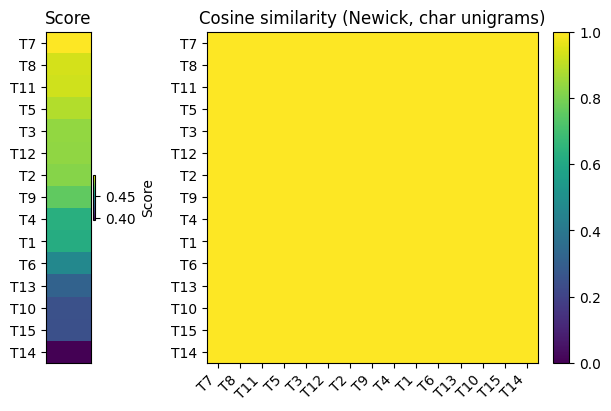

In [151]:
# Minimal: df must have columns "tree" and "score". Assumes you already defined `newick(...)`.
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import matplotlib.pyplot as plt

def plot_tree_cosine_from_df(df):
    newicks = [newick(t) for t in df["tree"]]
    X = TfidfVectorizer(analyzer="char").fit_transform(newicks)  # no ngram arg
    print(X)
    S = cosine_similarity(X)

    scores = df["score"].to_numpy(float)
    order = np.argsort(-scores)
    S = S[order][:, order]; scores = scores[order]
    labels = [f"T{i+1}" for i in order]

    fig, (ax_strip, ax_mat) = plt.subplots(
        1, 2, figsize=(6, 4), gridspec_kw={"width_ratios": [0.12, 1]}, constrained_layout=True
    )
    im_strip = ax_strip.imshow(scores[:, None], aspect="auto")
    ax_strip.set_xticks([]); ax_strip.set_yticks(range(len(labels))); ax_strip.set_yticklabels(labels); ax_strip.set_title("Score")
    fig.colorbar(im_strip, ax=ax_strip, fraction=0.05).set_label("Score")

    im = ax_mat.imshow(S, vmin=0, vmax=1)
    ax_mat.set_xticks(range(len(labels))); ax_mat.set_yticks(range(len(labels)))
    ax_mat.set_xticklabels(labels, rotation=45, ha="right"); ax_mat.set_yticklabels(labels)
    ax_mat.set_title("Cosine similarity (Newick, char unigrams)")
    fig.colorbar(im, ax=ax_mat, fraction=0.046, pad=0.04)
    return order


order = plot_tree_cosine_from_df(df_all)

In [165]:
bfs = [str(breadth_first_splits(t)) for t in df_all["tree"]]
X = TfidfVectorizer(analyzer="char", ngram_range=(2,10)).fit_transform(bfs)  # no ngram arg

In [166]:
S = cosine_similarity(X)
S

array([[1.        , 0.77223224, 0.28841088, 0.6713758 , 0.50045411,
        0.38902423, 0.51556882, 0.48625401, 0.2812518 , 0.57023957,
        0.34514815, 0.47190218, 0.23901936, 0.39923997, 0.25859798],
       [0.77223224, 1.        , 0.29170537, 0.52101389, 0.54588005,
        0.42457788, 0.48093766, 0.47364456, 0.49556693, 0.39305618,
        0.36027208, 0.70316504, 0.32240322, 0.42624152, 0.38704159],
       [0.28841088, 0.29170537, 1.        , 0.32930991, 0.56808258,
        0.38200906, 0.47310825, 0.50364461, 0.37989495, 0.50863847,
        0.2525831 , 0.40727641, 0.8420958 , 0.55882868, 0.38433086],
       [0.6713758 , 0.52101389, 0.32930991, 1.        , 0.50990091,
        0.3562265 , 0.37538513, 0.76258169, 0.24153677, 0.50333113,
        0.50312688, 0.4611353 , 0.26844327, 0.34544827, 0.22637276],
       [0.50045411, 0.54588005, 0.56808258, 0.50990091, 1.        ,
        0.49440478, 0.3962269 , 0.67847977, 0.38909087, 0.28897712,
        0.38707556, 0.83266295, 0.41315083, 

In [3]:
# df must have columns: "tree" and "score"
# assumes you already defined `newick(obj)`
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS

def plot_tree_similarity_scatter(df, embeding="newick", ngram_range=(2,4)):

    # Newick → TF-IDF → cosine similarity
    if embeding == "bfs":
        newicks = [str(breadth_first_splits(t)) for t in df["tree"]]
    elif embeding == "dfs":
        newicks = [str(depth_first_splits(t)) for t in df["tree"]]
    else:
        embeding = "newick"
        newicks = [newick(t) for t in df["tree"]]

    X = TfidfVectorizer(analyzer="char", ngram_range=ngram_range).fit_transform(newicks)
    S = cosine_similarity(X)                         # similarity (absolute; no reordering)
    D = 1.0 - S                                      # distance for embedding

    # MDS: finds 2D coords whose Euclidean distances best match the given distance matrix
    # by minimizing sum of squared distance mismatches. `dissimilarity="precomputed"`
    # tells it we’re passing D directly, and `random_state` just fixes the initialization.
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=0).fit_transform(D)

    # color by accuracy (min → max gradient)
    scores = df["score"].to_numpy(float)
    vmin, vmax = float(scores.min()), float(scores.max())

    sc = plt.scatter(coords[:,0], coords[:,1], c=scores, vmin=vmin, vmax=vmax, s=60, cmap="viridis")
    plt.title(f"Tree clusters (MDS of cosine on {embeding})")
    plt.xlabel("Meaningless dim 1"); plt.ylabel("Meaningless dim 2")
    cbar = plt.colorbar(sc); cbar.set_label("Accuracy")
    plt.tight_layout()
    return S, coords

{0: ['((((', '((', '),', '),2)', '),2', '),4)'], 1: [',(1,', ',(1', '),(1', '))', ',(', '),('], 2: ['2,', '(2', '(2,', '(((2', '((2', '((2,'], 3: ['(3', '3,4', '(3,', '(3,4', '3,', '3,4)']}


/Users/22701987/Documents/code/simulation/venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


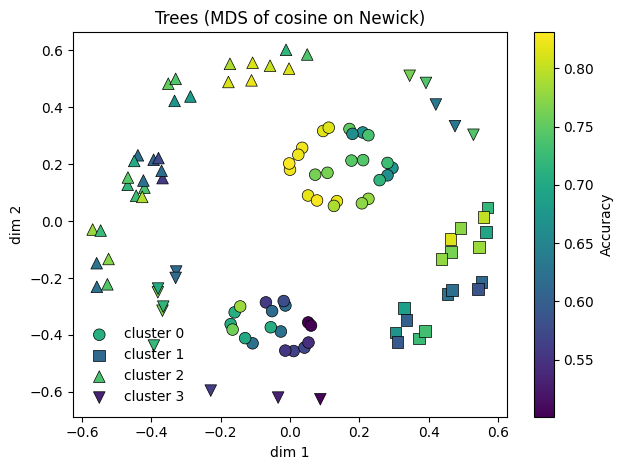

In [16]:
# df must have columns: "tree" and "score"
# assumes you already defined `newick(obj)` from earlier
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.cluster import AgglomerativeClustering
def cluster_trees(df, n_clusters=3, ngram=(2,4)):
    """
    Returns:
      info_df: original df + x,y coords + cluster id
      explain: {cluster_id: [top n-grams that define this cluster]}
    Plot: 2D scatter (MDS) colored by accuracy, marker shape per cluster.

    How MDS axes work (quickly):
      We compute cosine distances between trees, then MDS finds 2D points
      whose Euclidean distances best match those distances (axes have no
      intrinsic meaning; only pairwise distances matter).
    """


    # 1) Newick → TF-IDF char n-grams → cosine similarity
    vec = TfidfVectorizer(analyzer="char", ngram_range=ngram, norm="l2")
    newicks = [newick(t) for t in df["tree"]]
    X = vec.fit_transform(newicks)
    S = cosine_similarity(X)
    D = 1.0 - S  # cosine distance

    # 2) 2D layout (MDS)
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=0).fit_transform(D)

    # 3) Clustering on distances (average-link agglomerative, works with precomputed)
    clus = AgglomerativeClustering(n_clusters=n_clusters, metric="precomputed", linkage="average")
    labels = clus.fit_predict(D)

    # 4) Plot: color = accuracy, marker = cluster
    scores = df["score"].to_numpy(float)
    markers = ["o", "s", "^", "v", "<", ">", "P", "X", "D", "*"]
    for c in range(n_clusters):
        idx = (labels == c)
        plt.scatter(coords[idx,0], coords[idx,1],
                    c=scores[idx], cmap="viridis",
                    vmin=float(scores.min()), vmax=float(scores.max()),
                    s=70, marker=markers[c % len(markers)], edgecolors="k", linewidths=0.5,
                    label=f"cluster {c}")
    # tiny labels to link back to rows
    # for i, (x, y) in enumerate(coords):
    #     plt.text(x, y, str(i+1), fontsize=8, ha="center", va="center")

    plt.title("Trees (MDS of cosine on Newick)")
    plt.xlabel("dim 1"); plt.ylabel("dim 2")
    cbar = plt.colorbar(); cbar.set_label("Accuracy")
    plt.legend(frameon=False)
    plt.tight_layout()

    # 5) Explain clusters: top n-grams with highest (cluster mean − global mean)
    explain = {}
    global_mean = X.mean(axis=0).A1
    terms = vec.get_feature_names_out()
    for c in range(n_clusters):
        xc = X[labels == c]
        if xc.shape[0] == 0:
            explain[c] = []
            continue
        diff = (xc.mean(axis=0).A1 - global_mean)
        top_idx = diff.argsort()[-6:][::-1]   # top ~6 short, readable
        explain[c] = [terms[j] for j in top_idx]

    # 6) Return a tidy mapping so you can inspect actual trees per cluster
    # info_df = df.copy()
    # info_df["x"] = coords[:,0]
    # info_df["y"] = coords[:,1]
    # info_df["cluster"] = labels
    # info_df["id"] = np.arange(1, len(df)+1)  # matches the small point labels

    return explain
explain = cluster_trees(df_all, n_clusters=4, ngram=(2,4))
print(explain)

In [83]:
# df must have columns: "tree" and "score"
# assumes you already defined `newick(obj)`

# df must have columns: "tree" and "score"
# assumes you already defined `newick(obj)`

import numpy as np, pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import plotly.express as px
from generate_data import newick, breadth_first_splits, depth_first_splits
import matplotlib.pyplot as plt
import mpld3
from collections import deque

from bokeh.plotting import figure, show
from bokeh.io import output_file, save
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Inferno256, Blues, BuGn, RdYlGn
from bokeh.transform import linear_cmap, factor_mark
from bokeh.models import LinearColorMapper, ColorBar, Title

import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, permutation_test_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy.stats import kruskal
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import silhouette_score
from bokeh.models import Div
from bokeh.layouts import row, column

def bfs_splits(tree):
    # normalise each split: sort labels; bigger side left (tie → lexicographic)
    S = [ (tuple(sorted(L)), tuple(sorted(R))) for (L,R) in tree ]
    S = [ (max(a,b, key=lambda t:(len(t), t)), min(a,b, key=lambda t:(len(t), t))) for a,b in S ]

    # map subset → split; find root label set
    by = { frozenset((*L, *R)): (L, R) for (L, R) in S }
    root = set().union(*[ set(L)|set(R) for (L,R) in S ])

    # BFS order
    out, q = [], deque([root])
    while q:
        U = q.popleft()
        if len(U) <= 1: 
            continue
        L, R = by[frozenset(U)]
        out.append((L, R))
        q.append(set(L)); q.append(set(R))
    return tuple(out)

def cluster_trees_interactive(df, embeding="newick", ngram_range=(2,4), n_clusters=4):
    # Newick → TF-IDF → cosine similarity
    if embeding == "bfs":
        newicks = [str(breadth_first_splits(t)) for t in df["tree"]]
    elif embeding == "dfs":
        newicks = [str(depth_first_splits(t)) for t in df["tree"]]
    else:
        embeding = "newick"
        newicks = [newick(t) for t in df["tree"]]
    # 1) Strings → TF-IDF (char n-grams) → cosine distances
    newicks = [newick(t) for t in df["tree"]]
    vec = TfidfVectorizer(analyzer="char", ngram_range=ngram_range, norm="l2")
    X = vec.fit_transform(newicks)
    S = cosine_similarity(X)
    D = 1.0 - S

    # 2) MDS puts points in 2D so Euclidean distances ≈ our cosine distances (minimizes "stress")
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=0).fit_transform(D)

    # 3) Quick clustering in 2D (readable, not precious)
    labels = KMeans(n_clusters=n_clusters, n_init=10, random_state=0).fit_predict(coords)

    # 4) Plotly scatter with rich hover
    out = df[["tree", "score"]]
    out[embeding] = newicks
    out["cluster"] = labels
    out["tree_str"] = [str(t) for t in out["tree"]]

    fig = px.scatter(
        df, x="x", y="y",
        color="score", color_continuous_scale="Viridis",
        symbol="cluster",
        hover_name="newick",
        hover_data={"score":":.3f", "cluster":True, "tree_str":True, "x":":.3f", "y":":.3f"},
        title="Trees (MDS of cosine on Newick)"
    )
    return fig, out

# mpld3.save_html(plt.gcf(), "trees.html")
# mpld3.show()  # opens in a browser

from bokeh.plotting import figure, show
from bokeh.io import output_file, save
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.palettes import Inferno256, Blues, BuGn, RdYlGn
from bokeh.transform import linear_cmap, factor_mark
from bokeh.models import LinearColorMapper, ColorBar, Title

import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, permutation_test_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from scipy.stats import kruskal
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import silhouette_score
from bokeh.models import Div
from bokeh.layouts import column as bcol, row as brow   # <-- alias to avoid shadowing

def check_label_fit(labels, y, coords):

    df_eval = pd.DataFrame({
        "score": y,
        "cluster": pd.Categorical(labels)   # no manual one-hot; just mark as categorical
    })

    # OLS with cluster fixed effects
    ols = smf.ols("score ~ C(cluster)", data=df_eval).fit()
    r2_in_sample = float(ols.rsquared)

    # ANOVA table (Type II)
    anova = sm.stats.anova_lm(ols, typ=2)

    # Sums of squares and dfs
    ss_between = float(anova.loc["C(cluster)", "sum_sq"])
    df_between = float(anova.loc["C(cluster)", "df"])
    ss_within  = float(anova.loc["Residual",   "sum_sq"])
    df_within  = float(anova.loc["Residual",   "df"])

    # Mean square within (pooled within-cluster variance estimate)
    ms_within = ss_within / df_within

    # Effect sizes:
    #   η²  = SS_between / (SS_between + SS_within)
    #   ω²  = (SS_between - df_between * MS_within) / (SS_total + MS_within)
    ss_total = ss_between + ss_within
    eta_sq   = ss_between / ss_total
    omega_sq = (ss_between - df_between * ms_within) / (ss_total + ms_within)

    # Optional: per-cluster descriptive stats
    per_cluster = df_eval.groupby("cluster")["score"].agg(["count", "mean", "std"]).sort_index()
    # print(per_cluster)

    # ----------------------------- (B) Mixed-effects ICC (random intercepts) -----------------------------
    # Model: score_ij = μ + u_j + ε_ij, with u_j ~ N(0, σ_u^2) for cluster j, ε_ij ~ N(0, σ^2)
    # ICC = σ_u^2 / (σ_u^2 + σ^2)
    md = sm.MixedLM.from_formula("score ~ 1", groups="cluster", data=df_eval)
    m  = md.fit(reml=True)  # REML for variance components

    # Between-cluster variance (random intercept variance)
    var_cluster = float(m.cov_re.iloc[0, 0])
    # Within-cluster (residual) variance
    var_resid   = float(m.scale)

    icc = var_cluster / (var_cluster + var_resid)

    sil = silhouette_score(coords, labels, metric="euclidean")

    return_values = {
        "r2_in_sample": r2_in_sample,
        "eta_sq": eta_sq,
        "omega_sq": omega_sq,
        "icc": icc,
        "sil": sil
    }

    return return_values

def embed_tree(df, embeding):
    if embeding == "bfs":
        # newicks = [str(breadth_first_splits(t)) for t in df["tree"]]
        df["tree_encoded"] = df["tree"].apply(lambda x: (bfs_splits(x)))
    elif embeding == "dfs":
        # newicks = [str(depth_first_splits(t)) for t in df["tree"]]
        df["tree_encoded"] = df["tree"].apply(lambda x: str(depth_first_splits(x)))
    else:
        embeding = "newick"
        # newicks = [newick(t) for t in df["tree"]]
        df["tree_encoded"] = df["tree"].apply(newick)
    # newicks = sorted(newicks)
    # df['tree_encoded'] = newicks
    df = df.sort_values(by='tree_encoded')
    return df

def html_similarity_scatter(df, embeding="newick", ngram_range=(2,4), n_clusters=4, to_html=None, analyzer=None, tokenize=None, vec=None, cards_per_row=None):

    # Newick → TF-IDF → cosine similarity
    df = embed_tree(df, embeding)
    newicks = df["tree_encoded"]

    # --- unify vectorizer so we can get feature names later ---
    if analyzer is not None:
        vec_used = TfidfVectorizer(analyzer=analyzer, lowercase=False, norm="l2")
    elif vec is not None:
        vec_used = vec
    elif tokenize is not None:
        vec_used = TfidfVectorizer(analyzer="word", token_pattern=tokenize)
    else:
        vec_used = TfidfVectorizer(analyzer="char", ngram_range=ngram_range, norm="l2")

    X = vec_used.fit_transform(newicks)
    feature_names = np.array(vec_used.get_feature_names_out())

    S = cosine_similarity(X)                         # similarity (absolute; no reordering)
    D = 1.0 - S                                      # distance for embedding

    # MDS: finds 2D coords whose Euclidean distances best match the given distance matrix
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=0).fit_transform(D)
    labels = KMeans(n_clusters=n_clusters, n_init=20, random_state=0).fit_predict(coords)

    all_vals = check_label_fit(labels, df["score"].to_numpy(float), coords)
    r2_in_sample, eta_sq, omega_sq, icc, sil = all_vals["r2_in_sample"], all_vals["eta_sq"], all_vals["omega_sq"], all_vals["icc"], all_vals["sil"]

    print(f"In-sample R^2 = {r2_in_sample:.3f} — fraction of variance in accuracy explained by cluster labels in this sample (fixed-effects OLS).")
    print(f"η² = {eta_sq:.3f} — ANOVA effect size: proportion of total accuracy variance attributable to differences between clusters (in-sample).")
    print(f"ω² = {omega_sq:.3f} — bias-corrected effect size estimating the population proportion of accuracy variance explained by cluster membership.")
    print(f"ICC = {icc:.3f} — intraclass correlation from a random-intercepts model: share of accuracy variance due to between-cluster differences (0=no signal, 1=all between-cluster).")
    print(f"Silhouette = {sil:.3f} — mean of (b-a)/max(a,b), comparing a=dist to cluster center to b=nearest-other-cluster distance (−1 bad, 0 overlap, +1 well-separated).")

    cluster_str = labels.astype(str)

    # color by accuracy (min → max gradient)
    scores = df["score"].to_numpy(float)
    vmin, vmax = float(scores.min()), float(scores.max())
    out = df[["tree", "score"]]
    out[embeding] = newicks
    out["cluster"] = labels.astype(str)

    cluster_levels = sorted(set(cluster_str))
    marker_list = [
        "circle", "square", "triangle", "diamond", "inverted_triangle",
        "star", "hex", "circle_cross", "circle_x", "circle_dot",
        "square_cross", "square_x", "square_dot",
        "diamond_cross", "diamond_dot",
        "triangle_dot", "triangle_pin",
        "cross", "x", "asterisk", "star", "hex",
        "plus", "dash", "dot",
        "star_dot", "square_pin",
    ][:len(cluster_levels)]
    marker_map = dict(zip(cluster_levels, marker_list))
    marker_col = [marker_map[c] for c in cluster_str]  # one marker per point

    src = ColumnDataSource(dict(
        x=coords[:,0], y=coords[:,1],
        score=df["score"].astype(float).to_numpy(),
        cluster=labels, newick=newicks,  marker=marker_col, 
        tree=[str(t) for t in df["tree"]],
    ))
    p = figure(title=f"Trees (MDS of cosine on {embeding}) with {n_clusters}-clusters", width=800, height=520,
            tools="pan,wheel_zoom,reset,save")
    mapper = linear_cmap("score", palette=list(RdYlGn.get(8))[::-1], low=src.data["score"].min(), high=src.data["score"].max())

    p.scatter("x", "y", source=src, size=9, marker="marker", color=mapper, line_color="#222", alpha=0.9)

    adj_r2 = float(r2_in_sample)
    w2     = float(omega_sq)
    sil_v  = float(sil)
    def tag(v, good, ok):
        return "🟢 good" if v >= good else ("🟡 fine" if v >= ok else "🔴 bad")

    r2_tag  = tag(adj_r2, good=0.50, ok=0.20)
    w2_tag  = tag(w2,     good=0.50, ok=0.20)
    sil_tag = tag(sil_v,  good=0.50, ok=0.25)

    acc_div = Div(text=f"""
    <div style="border:1px solid #ddd;border-radius:8px;padding:10px;margin-top:6px;background:#fafafa; font-size:13px;">
    <h4 style="margin:0 0 6px 0;">Accuracy Fit</h4>
    <div style="margin-bottom:6px;">
        <strong>Adj&nbsp;R²:</strong> {adj_r2:.3f} &nbsp;{r2_tag}<br>
        <meter min="0" max="1" low="0.20" high="0.50" optimum="0.70" value="{adj_r2:.4f}" style="width:100%"></meter>
    </div>
    <div>
        <strong>ω²:</strong> {w2:.3f} &nbsp;{w2_tag}<br>
        <meter min="0" max="1" low="0.20" high="0.50" optimum="0.70" value="{w2:.4f}" style="width:100%"></meter>
    </div>
    <div style="margin-top:6px;"><small>
        R²: share of accuracy variance explained by cluster labels (in-sample). 
        <br>
        ω²: is bias-corrected R².
    </small></div>
    </div>
    """, width=int(p.width/2)-12)

    geo_div = Div(text=f"""
    <div style="border:1px solid #ddd;border-radius:8px;padding:10px;margin-top:6px;background:#fafafa; font-size:13px;">
    <h4 style="margin:0 0 6px 0;">Geometric Fit</h4>
    <div>
        <strong>Silhouette:</strong> {sil_v:.3f} &nbsp;{sil_tag}<br>
        <meter min="-1" max="1" low="0.25" high="0.50" optimum="0.7" value="{sil_v:.4f}" style="width:100%"></meter>
    </div>
    <div style="margin-top:6px;"><small>
        Silhouette: mean of (b-a)/max(a,b), comparing a=dist to cluster center to b=nearest-other-cluster distance.
    </small></div>
    </div>
    """, width=int(p.width/2)-12)

    cbar = ColorBar(color_mapper=mapper.transform)
    p.add_layout(cbar, 'right')

    print(f"In-sample R^2 = {r2_in_sample:.3f} — fraction of variance in accuracy explained by cluster labels in this sample (fixed-effects OLS).")
    print(f"η² = {eta_sq:.3f} — ANOVA effect size: proportion of total accuracy variance attributable to differences between clusters (in-sample).")
    print(f"ω² = {omega_sq:.3f} — bias-corrected effect size estimating the population proportion of accuracy variance explained by cluster membership.")
    print(f"ICC = {icc:.3f} — intraclass correlation from a random-intercepts model: share of accuracy variance due to between-cluster differences (0=no signal, 1=all between-cluster).")
    print(f"Silhouette = {sil:.3f} — mean of (b-a)/max(a,b), comparing a=dist to cluster center to b=nearest-other-cluster distance (−1 bad, 0 overlap, +1 well-separated).")

    p.add_tools(HoverTool(tooltips=[("acc","@score{0.000}"),("tree","@newick")]))

    X = X.tocsr(); fn = feature_names; L = labels; mm = marker_map
    cols = cards_per_row if cards_per_row is not None else 4

    # 1) ω² per feature across all clusters
    g = pd.Series(L, name='g')
    w2 = np.zeros(X.shape[1])
    for j in range(X.shape[1]):
        y = pd.Series(X[:, j].toarray().ravel(), name='y')
        aov = sm.stats.anova_lm(ols('y ~ C(g)', data=pd.concat([y, g], axis=1)).fit(), typ=2)
        ss, df = aov.loc['C(g)', ['sum_sq','df']]
        ssr, dfr = aov.loc['Residual', ['sum_sq','df']]
        ms = ssr / dfr
        w2[j] = max((ss - df*ms) / (ss + ssr + ms), 0.0)   # ω²

    # simple icon map for your existing marker names
    icon = {"circle":"●","square":"■","triangle":"▲","diamond":"◆","inverted_triangle":"▼","star":"✶","hex":"⬢",
            "circle_cross":"⊕","circle_x":"⊗","circle_dot":"◉","square_cross":"⊞","square_x":"☒","square_dot":"▣",
            "cross":"✚","x":"✕","asterisk":"✱","plus":"＋","dash":"–","dot":"•","diamond_cross":"⟐","diamond_dot":"◈",
            "triangle_dot":"▲","triangle_pin":"▲","star_dot":"✶","square_pin":"■"}

    # 2) Cards per cluster: pick terms by in-cluster mean, show ω² bars
    cards = []
    for c in range(n_clusters):
        idx = np.where(L == c)[0]
        if not idx.size: continue
        mc = X[idx].mean(0).A1
        top = mc.argsort()[-6:][::-1]           # show common-in-cluster terms
        vmax = float(w2[top].max()) or 1.0
        rows = ''.join(
            f'<div style="display:flex;gap:8px;align-items:center;margin:4px 0;">'
            f'<span style="min-width:150px;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;">{fn[i]}</span>'
            f'<meter min="0" max="{vmax:.6f}" value="{w2[i]:.6f}" style="flex:1;height:14px;"></meter>'
            f'<span style="min-width:56px;text-align:right;">{w2[i]:.2f}</span></div>'
            for i in top
        )
        mname = mm[str(c)]
        cards.append(
            f'<div style="border:1px solid #ccc;border-radius:12px;padding:12px;background:#F8FAFD;">'
            f'<div style="display:flex;justify-content:space-between;align-items:center;margin-bottom:6px;">'
            f'<b>Cluster {c}</b><span><small>n={idx.size}</small>&nbsp;<span style="font-size:22px;">{icon.get(mname,"•")}</span></span></div>'
            f'{rows}</div>'
        )

    cluster_div = Div(text=
    f'<div style="border:1px solid #ddd;border-radius:12px;padding:12px;margin-top:8px;background:#fff;">'
    f'<h4 style="margin:0 0 8px 0;">Cluster Content Summary — ω² (variance explained by clusters)</h4>'
    f'<div style="display:grid;grid-template-columns:repeat({cols},1fr);gap:12px;">{"".join(cards)}</div>'
    f'<div style="margin-top:6px;font-size:12px;"><em>ω²: bias-corrected ANOVA R² per term (higher = more of that term’s variance is due to cluster differences).</em></div>'
    f'</div>', width=p.width)

    layout = bcol(p, brow(acc_div, geo_div), cluster_div, sizing_mode="stretch_width")
    if to_html is not None:
        output_file(to_html); 
        save(layout)
        show(layout)

    return S, coords


In [10]:
import psycopg2
import json 
import pandas as pd
import generate_data as gd
import sqlalchemy as sa
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
import os
import ast, itertools
from sklearn.feature_extraction.text import TfidfVectorizer
import re
password = os.environ['ML_POSTGRESS_URL'].split(':')[2].split("@")[0]
# host = os.environ['ML_POSTGRESS_HOST']
host = "2m43izca46y.db.cloud.edu.au"
database = "simulation"
engine = sa.create_engine( f"postgresql://max:{password}@{host}" + f"/{database}")
conn = psycopg2.connect(host=host, dbname=database, user='max', password=password)

run_name = "2511028706"	
run_name = "2330035447"	

run_name = "837710893" # 6 Classes Lower acc
run_name = "412560783" # 7 Classes
run_name = "1049068982"	# 5 Classes
run_name = "1327087827" # 6 Classes Lower acc
run_name = "3840264976" # 6 Classes Lower acc
run_name = "4073907221" # 6 Classes Higher acc
run_name = "2366169141"

run_name = "412560783"

sql_query = f"""
SELECT 
    sims.nd_structure as tree, 
    sims.accuracy as score
FROM 
    simulation_model_registry sims
WHERE
    simulation_id = '{run_name}'
ORDER BY tree_number DESC;
"""
df_all= pd.read_sql(sql_query, conn)
conn.close()
tokenizer = r'(?<=\()[0-9]+(?:\s*,\s*[0-9]+)*(?=\))'  # matches "(1, 2, 3)" but not the parens

NUMBER_OF_CLASSES = max(map(int, re.findall(r'-?\d+', df_all['tree'][0]))) + 1

def split_analyzer(doc):
    splits = ast.literal_eval(doc) if isinstance(doc, str) else doc
    # max_depth = 4
    toks = []
    for d, (L, R) in enumerate(splits):

        L = tuple(sorted(L)) 
        R = tuple(sorted(R))   # order inside each side
        c = [L, R]
        c.sort(key=len, reverse=True)
        A = c[0]
        B = c[1]
        # A, B = sorted([L, R])  
        # A = ",".join(map(str, A_seq))
        # B = ",".join(map(str, B_seq))
        # depth_prefix = f"d{d}|"
        w = (NUMBER_OF_CLASSES - 2) - min(d, NUMBER_OF_CLASSES - 3)
        new = NUMBER_OF_CLASSES - d
        toks.extend([f"split:{A}|{B}"])

        toks.extend([f"sz:{len(A)}|{len(B)}"]*new)

        toks.extend([f"group:{A}"]*len(A))
        toks.extend([f"group:{B}"]*len(B))

        # toks.extend([f"group:{A}"])
        # toks.extend([f"group:{B}"])
        # # toks.append(f"group:{B}")
        
        # encourage grouping via co-membership pairs (repeatable across trees)
        for side in (A, B):
            for i, j in itertools.combinations(side, 2):
                toks.extend([f"pair:{i}-{j}"])
                # toks.extend([f"pair:{i}-{j}"]*(d+1))
    return toks

embeding = "bfs"

n_clusters=15
ngram_range=(2,4)
note=""
# vectorizer: encourage overlap, trim one-offs
vec = TfidfVectorizer(
    analyzer=split_analyzer,
    # lowercase=False, norm="l2", binary=True, min_df=2, sublinear_tf=True
)

info_df, coords = html_similarity_scatter(df_all, n_clusters=n_clusters, embeding=embeding, vec=vec, to_html=f"img/{run_name}_{embeding}_{n_clusters}_{note}.html")

# info_df, coords = html_similarity_scatter(df_all, n_clusters=n_clusters, embeding=embeding, ngram_range=ngram_range, to_html=f"img/{run_name}_{embeding}_{n_clusters}_{note}.html")

# df_all.describe
# info_df, coords = html_similarity_scatter(df_all, n_clusters=4, embeding=embeding, analyzer=split_analyzer, to_html=f"img/{run_name}_{embeding}.html")

/var/folders/h2/7j0s980d2w7951jcy8zc25ww08y435/T/ipykernel_56399/771938766.py:46: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all= pd.read_sql(sql_query, conn)
/Users/22701987/Documents/code/simulation/venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/var/folders/h2/7j0s980d2w7951jcy8zc25ww08y435/T/ipykernel_56399/2443460720.py:112: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per_cluster = df_eval.groupby("cluster")["score"].agg(["count", "mean", "std"]).sort_index()
/Users/22701987/Documents/code/simulation/venv/lib/python3.10/s

In-sample R^2 = 0.472 — fraction of variance in accuracy explained by cluster labels in this sample (fixed-effects OLS).
η² = 0.472 — ANOVA effect size: proportion of total accuracy variance attributable to differences between clusters (in-sample).
ω² = 0.471 — bias-corrected effect size estimating the population proportion of accuracy variance explained by cluster membership.
ICC = 0.502 — intraclass correlation from a random-intercepts model: share of accuracy variance due to between-cluster differences (0=no signal, 1=all between-cluster).
Silhouette = 0.492 — mean of (b-a)/max(a,b), comparing a=dist to cluster center to b=nearest-other-cluster distance (−1 bad, 0 overlap, +1 well-separated).
In-sample R^2 = 0.472 — fraction of variance in accuracy explained by cluster labels in this sample (fixed-effects OLS).
η² = 0.472 — ANOVA effect size: proportion of total accuracy variance attributable to differences between clusters (in-sample).
ω² = 0.471 — bias-corrected effect size estima

Best number of clusters by Silhouette Score: 7 with sihloutte score 0.49830857614300733


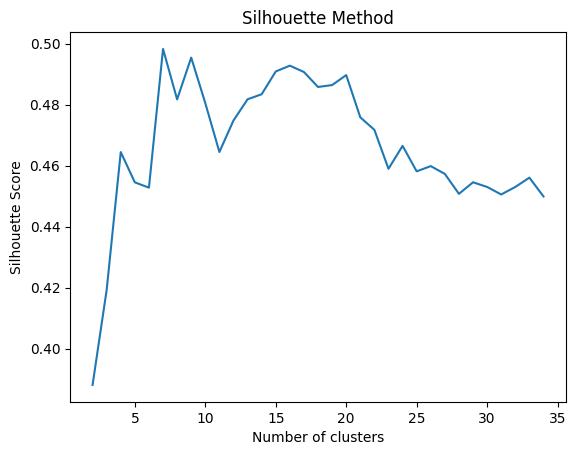

In [7]:
silhouette_scores = []
best = 0
for i in range(2, 35):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=0)
    kmeans.fit(coords)
    score = silhouette_score(coords, kmeans.labels_)
    silhouette_scores.append(score)
    if score > best:
    
        best = score
        best_k = i

print(f"Best number of clusters by Silhouette Score: {best_k} with sihloutte score {best}")
plt.plot(range(2, 35), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Now gen for ND based data

In [ ]:
from grakel import Graph
from grakel.kernels import WeisfeilerLehman, VertexHistogram, NeighborhoodSubgraphPairwiseDistance
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
import numpy as np

def tree_to_graph(tree_encoded):
    """Convert nested dichotomy to graph"""
    edges = []
    node_labels = {}
    for i, (left, right) in enumerate(tree_encoded):
        left_id = f"L{i}"
        right_id = f"R{i}"
        
        # Edge from split to left and right groups
        edges.append((i, left_id))
        edges.append((i, right_id))
        
        # Label nodes with the class sets
        node_labels[i] = f"split"
        node_labels[left_id] = str(tuple(sorted(left)))
        node_labels[right_id] = str(tuple(sorted(right)))
    
    return Graph(edges, node_labels=node_labels)

def html_similarity_grakel(df, embeding="newick", ngram_range=(2,4), n_clusters=4, to_html=None, analyzer=None, tokenize=None, vec=None, cards_per_row=None):

    # Newick → TF-IDF → cosine similarity
    df = embed_tree(df, embeding)
    newicks = df["tree_encoded"]

    # --- unify vectorizer so we can get feature names later ---
    if analyzer is not None:
        vec_used = TfidfVectorizer(analyzer=analyzer, lowercase=False, norm="l2")
    elif vec is not None:
        vec_used = vec
    elif tokenize is not None:
        vec_used = TfidfVectorizer(analyzer="word", token_pattern=tokenize)
    else:
        vec_used = TfidfVectorizer(analyzer="char", ngram_range=ngram_range, norm="l2")

    # X = vec_used.fit_transform(newicks)
    # feature_names = np.array(vec_used.get_feature_names_out())

    # S = cosine_similarity(X)                         # similarity (absolute; no reordering)
    # D = 1.0 - S                                      # distance for embedding

    # # MDS: finds 2D coords whose Euclidean distances best match the given distance matrix
    # coords = MDS(n_components=2, dissimilarity="precomputed", random_state=0).fit_transform(D)
    # labels = KMeans(n_clusters=n_clusters, n_init=20, random_state=0).fit_predict(coords)
    # Convert trees to graphs
    # graphs = [tree_to_graph(tree) for tree in df['tree_encoded']]
    graphs = [tree_to_graph(tree) for tree in newicks]
    # Compute kernel matrix
    gk = WeisfeilerLehman(n_iter=4, base_graph_kernel=VertexHistogram, normalize=True)
    # gk = NeighborhoodSubgraphPairwiseDistance(r=3, d=2)
    K = gk.fit_transform(graphs)
    # feature_names = np.array(K._inv_labels())

    # Convert similarity to distance
    D = 1.0 - K

    # Embed and cluster
    coords = MDS(n_components=2, dissimilarity="precomputed", random_state=0).fit_transform(D)
    labels = KMeans(n_clusters=n_clusters, n_init=20, random_state=0).fit_predict(coords)

    all_vals = check_label_fit(labels, df["score"].to_numpy(float), coords)
    r2_in_sample, eta_sq, omega_sq, icc, sil = all_vals["r2_in_sample"], all_vals["eta_sq"], all_vals["omega_sq"], all_vals["icc"], all_vals["sil"]

    print(f"In-sample R^2 = {r2_in_sample:.3f} — fraction of variance in accuracy explained by cluster labels in this sample (fixed-effects OLS).")
    print(f"η² = {eta_sq:.3f} — ANOVA effect size: proportion of total accuracy variance attributable to differences between clusters (in-sample).")
    print(f"ω² = {omega_sq:.3f} — bias-corrected effect size estimating the population proportion of accuracy variance explained by cluster membership.")
    print(f"ICC = {icc:.3f} — intraclass correlation from a random-intercepts model: share of accuracy variance due to between-cluster differences (0=no signal, 1=all between-cluster).")
    print(f"Silhouette = {sil:.3f} — mean of (b-a)/max(a,b), comparing a=dist to cluster center to b=nearest-other-cluster distance (−1 bad, 0 overlap, +1 well-separated).")

    cluster_str = labels.astype(str)

    # color by accuracy (min → max gradient)
    scores = df["score"].to_numpy(float)
    vmin, vmax = float(scores.min()), float(scores.max())
    out = df[["tree", "score"]]
    out[embeding] = newicks
    out["cluster"] = labels.astype(str)

    cluster_levels = sorted(set(cluster_str))
    marker_list = [
        "circle", "square", "triangle", "diamond", "inverted_triangle",
        "star", "hex", "circle_cross", "circle_x", "circle_dot",
        "square_cross", "square_x", "square_dot",
        "diamond_cross", "diamond_dot",
        "triangle_dot", "triangle_pin",
        "cross", "x", "asterisk", "star", "hex",
        "plus", "dash", "dot",
        "star_dot", "square_pin",
    ][:len(cluster_levels)]
    marker_map = dict(zip(cluster_levels, marker_list))
    marker_col = [marker_map[c] for c in cluster_str]  # one marker per point

    src = ColumnDataSource(dict(
        x=coords[:,0], y=coords[:,1],
        score=df["score"].astype(float).to_numpy(),
        cluster=labels, newick=newicks,  marker=marker_col, 
        tree=[str(t) for t in df["tree"]],
    ))
    p = figure(title=f"Trees (MDS of cosine on {embeding}) with {n_clusters}-clusters", width=800, height=520,
            tools="pan,wheel_zoom,reset,save")
    mapper = linear_cmap("score", palette=list(RdYlGn.get(8))[::-1], low=src.data["score"].min(), high=src.data["score"].max())

    p.scatter("x", "y", source=src, size=9, marker="marker", color=mapper, line_color="#222", alpha=0.9)

    adj_r2 = float(r2_in_sample)
    w2     = float(omega_sq)
    sil_v  = float(sil)
    def tag(v, good, ok):
        return "🟢 good" if v >= good else ("🟡 fine" if v >= ok else "🔴 bad")

    r2_tag  = tag(adj_r2, good=0.50, ok=0.20)
    w2_tag  = tag(w2,     good=0.50, ok=0.20)
    sil_tag = tag(sil_v,  good=0.50, ok=0.25)

    acc_div = Div(text=f"""
    <div style="border:1px solid #ddd;border-radius:8px;padding:10px;margin-top:6px;background:#fafafa; font-size:13px;">
    <h4 style="margin:0 0 6px 0;">Accuracy Fit</h4>
    <div style="margin-bottom:6px;">
        <strong>Adj&nbsp;R²:</strong> {adj_r2:.3f} &nbsp;{r2_tag}<br>
        <meter min="0" max="1" low="0.20" high="0.50" optimum="0.70" value="{adj_r2:.4f}" style="width:100%"></meter>
    </div>
    <div>
        <strong>ω²:</strong> {w2:.3f} &nbsp;{w2_tag}<br>
        <meter min="0" max="1" low="0.20" high="0.50" optimum="0.70" value="{w2:.4f}" style="width:100%"></meter>
    </div>
    <div style="margin-top:6px;"><small>
        R²: share of accuracy variance explained by cluster labels (in-sample). 
        <br>
        ω²: is bias-corrected R².
    </small></div>
    </div>
    """, width=int(p.width/2)-12)

    geo_div = Div(text=f"""
    <div style="border:1px solid #ddd;border-radius:8px;padding:10px;margin-top:6px;background:#fafafa; font-size:13px;">
    <h4 style="margin:0 0 6px 0;">Geometric Fit</h4>
    <div>
        <strong>Silhouette:</strong> {sil_v:.3f} &nbsp;{sil_tag}<br>
        <meter min="-1" max="1" low="0.25" high="0.50" optimum="0.7" value="{sil_v:.4f}" style="width:100%"></meter>
    </div>
    <div style="margin-top:6px;"><small>
        Silhouette: mean of (b-a)/max(a,b), comparing a=dist to cluster center to b=nearest-other-cluster distance.
    </small></div>
    </div>
    """, width=int(p.width/2)-12)

    cbar = ColorBar(color_mapper=mapper.transform)
    p.add_layout(cbar, 'right')

    print(f"In-sample R^2 = {r2_in_sample:.3f} — fraction of variance in accuracy explained by cluster labels in this sample (fixed-effects OLS).")
    print(f"η² = {eta_sq:.3f} — ANOVA effect size: proportion of total accuracy variance attributable to differences between clusters (in-sample).")
    print(f"ω² = {omega_sq:.3f} — bias-corrected effect size estimating the population proportion of accuracy variance explained by cluster membership.")
    print(f"ICC = {icc:.3f} — intraclass correlation from a random-intercepts model: share of accuracy variance due to between-cluster differences (0=no signal, 1=all between-cluster).")
    print(f"Silhouette = {sil:.3f} — mean of (b-a)/max(a,b), comparing a=dist to cluster center to b=nearest-other-cluster distance (−1 bad, 0 overlap, +1 well-separated).")

    p.add_tools(HoverTool(tooltips=[("acc","@score{0.000}"),("tree","@newick")]))

    X = K
    # fn = feature_names; 
    L = labels; mm = marker_map
    cols = cards_per_row if cards_per_row is not None else 4

    # 1) ω² per feature across all clusters
    g = pd.Series(L, name='g')
    w2 = np.zeros(X.shape[1])
    for j in range(X.shape[1]):
        y = pd.Series(X[:, j], name='y')
        aov = sm.stats.anova_lm(ols('y ~ C(g)', data=pd.concat([y, g], axis=1)).fit(), typ=2)
        ss, df = aov.loc['C(g)', ['sum_sq','df']]
        ssr, dfr = aov.loc['Residual', ['sum_sq','df']]
        ms = ssr / dfr
        w2[j] = max((ss - df*ms) / (ss + ssr + ms), 0.0)   # ω²

    # simple icon map for your existing marker names
    icon = {"circle":"●","square":"■","triangle":"▲","diamond":"◆","inverted_triangle":"▼","star":"✶","hex":"⬢",
            "circle_cross":"⊕","circle_x":"⊗","circle_dot":"◉","square_cross":"⊞","square_x":"☒","square_dot":"▣",
            "cross":"✚","x":"✕","asterisk":"✱","plus":"＋","dash":"–","dot":"•","diamond_cross":"⟐","diamond_dot":"◈",
            "triangle_dot":"▲","triangle_pin":"▲","star_dot":"✶","square_pin":"■"}

    # 2) Cards per cluster: pick terms by in-cluster mean, show ω² bars
    cards = []
    for c in range(n_clusters):
        idx = np.where(L == c)[0]
        if not idx.size: continue
        mc = X[idx].mean(0)
        top = mc.argsort()[-6:][::-1]           # show common-in-cluster terms
        vmax = float(w2[top].max()) or 1.0
        rows = ''.join(
            f'<div style="display:flex;gap:8px;align-items:center;margin:4px 0;">'
            # f'<span style="min-width:150px;white-space:nowrap;overflow:hidden;text-overflow:ellipsis;">{fn[i]}</span>'
            f'<meter min="0" max="{vmax:.6f}" value="{w2[i]:.6f}" style="flex:1;height:14px;"></meter>'
            f'<span style="min-width:56px;text-align:right;">{w2[i]:.2f}</span></div>'
            for i in top
        )
        mname = mm[str(c)]
        cards.append(
            f'<div style="border:1px solid #ccc;border-radius:12px;padding:12px;background:#F8FAFD;">'
            f'<div style="display:flex;justify-content:space-between;align-items:center;margin-bottom:6px;">'
            f'<b>Cluster {c}</b><span><small>n={idx.size}</small>&nbsp;<span style="font-size:22px;">{icon.get(mname,"•")}</span></span></div>'
            f'{rows}</div>'
        )

    cluster_div = Div(text=
    f'<div style="border:1px solid #ddd;border-radius:12px;padding:12px;margin-top:8px;background:#fff;">'
    f'<h4 style="margin:0 0 8px 0;">Cluster Content Summary — ω² (variance explained by clusters)</h4>'
    f'<div style="display:grid;grid-template-columns:repeat({cols},1fr);gap:12px;">{"".join(cards)}</div>'
    f'<div style="margin-top:6px;font-size:12px;"><em>ω²: bias-corrected ANOVA R² per term (higher = more of that term’s variance is due to cluster differences).</em></div>'
    f'</div>', width=p.width)

    layout = bcol(p, brow(acc_div, geo_div), cluster_div, sizing_mode="stretch_width")
    if to_html is not None:
        output_file(to_html); 
        save(layout)
        show(layout)

    return K, coords


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from numpy.random import Generator, PCG64
import numpy as np
import statsmodels.api as sm
from statsmodels.tools.sm_exceptions import PerfectSeparationError, ConvergenceWarning
from itertools import combinations

def _canon_split(left_set, right_set):
    """Canonicalize a split (A,B) so (A,B)==(B,A) for hashing/caching."""
    A = tuple(sorted(left_set))
    B = tuple(sorted(right_set))
    return (A, B) if A <= B else (B, A)

def tree_signatures(tree):
    """
    Tree is a tuple/list of splits from defined_all_trees:
      ((A1,B1), (A2,B2), ..., (A_{n-1},B_{n-1}))
    Return a frozenset of canonicalized splits.
    """
    return frozenset(_canon_split(a, b) for (a, b) in tree)

def split_loglik_star_sm(X, y, split, maxiter=200, eps=1e-12):
    """
    ℓ*(split) using statsmodels Logit (unpenalized MLE).
    Returns the node log-likelihood at the MLE (float).
    Degenerate targets (all 0/1) → return 0.0 (supremum in the limit).
    """
    A, B = split
    mask = np.isin(y, A + B)
    if not np.any(mask):
        return 0.0
    s = np.isin(y[mask], B).astype(int)

    if s.min() == s.max():
        return 0.0
    # Xsub = sm.add_constant(X[mask], has_constant="add")
    try: 
        # res = sm.Logit(s, Xsub).fit(disp=0, maxiter=maxiter, method="newton", tol=1e-6)
        # return float(res.llf)
        # res = sm.Logit(s, Xsub).fit(disp=0, maxiter=maxiter, method="lbfgs", tol=1e-6)
        # Direct log-likelihood at the MLE:
        lr = LogisticRegression(penalty=None, solver="newton-cholesky", max_iter=maxiter)
        # lr = LogisticRegression(penalty=None, solver="newton-cholesky", max_iter=maxiter)
        lr.fit(X[mask], s)
        p = lr.predict_proba(X[mask])[:, 1]
        return float(-log_loss(s, p, normalize=False))
    except PerfectSeparationError:
        print("Perfect Separation Error.")
        return 0.0
    except Exception as e:
        raise e
        # Any numerical prob: treat as saturated/flat
        # print("Failed to do normal so we are fitting regularized.")
        # p = np.clip(sm.Logit(s, Xsub).fit_regularized(alpha=1e-6, L1_wt=0.0, maxiter=maxiter).predict(), eps, 1-eps)
        # return float((s*np.log(p) + (1-s)*np.log(1-p)).sum())

def tree_loglik(tree):
    tot = 0.0
    for s in tree_signatures(tree):
        v = cache.get(s)
        if v is None:
            v = split_loglik_star_sm(X, y, s)
            cache[s] = v
        tot += v
    return tot

def bfs_splits(tree):
    # normalise each split: sort labels; bigger side left (tie → lexicographic)
    S = [ (tuple(sorted(L)), tuple(sorted(R))) for (L,R) in tree ]
    S = [ (max(a,b, key=lambda t:(len(t), t)), min(a,b, key=lambda t:(len(t), t))) for a,b in S ]

    # map subset → split; find root label set
    by = { frozenset((*L, *R)): (L, R) for (L, R) in S }
    root = set().union(*[ set(L)|set(R) for (L,R) in S ])

    # BFS order
    out, q = [], deque([root])
    while q:
        U = q.popleft()
        if len(U) <= 1: 
            continue
        L, R = by[frozenset(U)]
        out.append((L, R))
        q.append(set(L)); q.append(set(R))
    return tuple(out)

def v2_defined_all_trees(n: int):
    """Return a list of all ND trees over labels 0..n-1 (each tree is a tuple of splits)."""
    return list(_gen(tuple(range(n))))

def _gen(labels):
    labels = tuple(sorted(labels))
    if len(labels) <= 1:
        yield ()
        return
    s = labels[0]  # canonical rule: the smallest label stays on the 'left' side
    for r in range(1, len(labels)):
        for rest in combinations(labels[1:], r - 1):
            left  = tuple(sorted((s,) + rest))
            right = tuple(x for x in labels if x not in left)
            # normalize pair so children are unordered: larger side first, then lexicographic
            pair  = tuple(sorted((left, right), key=lambda t: (-len(t), t)))

            L = ((),) if len(left)  == 1 else tuple(_gen(left))
            R = ((),) if len(right) == 1 else tuple(_gen(right))

            for lt in L:
                for rt in R:
                    # pre-order DFS (shortest code). Swap to (lt+rt+(pair,)) if you want post-order.
                    yield (pair,) + lt + rt

In [95]:
import pandas as pd
import json
import generate_data as gd
import numpy as np
import psycopg2
import json 
import pandas as pd
import generate_data as gd
import sqlalchemy as sa
import os
import ast, itertools
from sklearn.feature_extraction.text import TfidfVectorizer
import re
cache = {}

password = os.environ['ML_POSTGRESS_URL'].split(':')[2].split("@")[0]
# host = os.environ['ML_POSTGRESS_HOST']
host = "2m43izca46y.db.cloud.edu.au"
database = "simulation"
engine = sa.create_engine( f"postgresql://max:{password}@{host}" + f"/{database}")
conn = psycopg2.connect(host=host, dbname=database, user='max', password=password)
# Import train test split 

# Import the train test split function from sci-kit
from sklearn.model_selection import train_test_split
# from sklearn. import train_test_split
# all_info = pd.read_clipboard()
# all_info.to_excel("data/general.xlsx", index=False)
# all_info = pd.read_excel("data/general.xlsx")

sim_id = 3891194763 # 5 classes
sim_id = 1278467595 # 4 classes
sim_id = 2330035447 
sim_id = 412560783
sim_id = 2925821139
sim_id = 623986934 # 6 classes
sim_id = 53548897 # 4 classes
sim_id = 3840264976 # 7 classes

sim_id = 3361664654
sim_id = 466052150
sim_id = 2741437726
sim_id = 2741437726

sim_id = 1871628256
sim_id = 774609303 # 5 classes

sim_id = 832107684 # 12 classes
sim_id = 2078238514 # 13 classes
sim_id = 3074882167 # 14 classes
sim_id = 2276442825 # 16 classes

sim_id = 1801022628 # 20 classes
sim_id = 1871628256 # 15 classes
sim_id = 2741437726 # 11 classes
sim_id = 832107684 # 12 classes

sim_id = 4265997001 # 8 classes
sim_id = 2969394773 # 7 classes

sim_id = 37326262 # 10 classes
sim_id = 1824777786 # 19 classes
sim_id = 726862791 # 21 classes
sim_id = 1121062968 # 20 classes
sim_id = 979389019 # 19 classes
sim_id = 774609303 # 5 classes


sim_id = 769391467 # 6 classes
sim_id = 3331943036 # 6 classes
sim_id = 960886367 # 6 classes
sim_id = 3339144425 # 6 classes
sim_id = 3222747319 # 6 classes
sim_id = 2746058379 # 6 classes

run_name = "412560783"

sql_query = f"""
SELECT 
    *
FROM 
    nd_simulations_dictionary sims
WHERE
    simulation_id = '{sim_id}';
"""
df_all= pd.read_sql(sql_query, conn)
conn.close()

# single_info = all_info[all_info['simulation_id'] == sim_id]

single_info = df_all[df_all['simulation_id'] == sim_id]
print(single_info)
for index, row in single_info.iterrows():
    dataset_name = row['name']
    simulation_id = row['simulation_id']
    seed = int(float(row['seed']))
    n_samples = int(float(row['n_samples']))
    n_classes = int(row['n_classes'])
    n_features = int(row['n_features'])
    # cov_beta = json.loads(row['covariates'])
    # intercepts = json.loads(row['intercept'])
    x_hash = int(row['x_hash'])
    y_hash = int(row['y_hash'])
    full_dataset_hash = int(row['full_dataset_hash'])
    extra_conditions = str(row['extra_condition'])
    # given_best_tree = row['selected_tree']
    cov = ast.literal_eval(row['covariates'])
    nd_structure = ast.literal_eval(row['generated_nd'])
    nd_params = ast.literal_eval(row['nd_params'])

    best_prev_tree = tuple(gd.bfs_splits(tuple(nd_structure)))

    # X, y, dist_types, proba, freq = gd.generate_mlr_data(seed, n_features, n_samples, n_classes, cov_beta, intercepts, extra_conditions=extra_conditions)
    X, y, dist_types, freq = gd.generate_nd_data(seed, n_features, n_samples, n_classes, cov, nd_structure, nd_params=nd_params, extra_conditions=extra_conditions)
    # gd.check_hashes(X, y, x_hash, y_hash, full_dataset_hash)
    df = pd.DataFrame(X, columns=[f"p{i+1}" for i in range(n_features)])
    # df['Y'] = y
    X, X_test, y, y_test = train_test_split(df, y, test_size=0.2, random_state=seed)
    categories = tuple(np.unique(y))
    print(categories)
    trees_defined = v2_defined_all_trees(len(categories))
    # Convert set back to list if needed
    all_trees = list(trees_defined)
    df_all = pd.DataFrame({
        "tree": all_trees,
        "score": [tree_loglik(T) for T in all_trees]
    })

/var/folders/h2/7j0s980d2w7951jcy8zc25ww08y435/T/ipykernel_76690/2660826077.py:86: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all= pd.read_sql(sql_query, conn)


   simulation_id                                               name  seed  \
0   2.746058e+09  nd_class=6_features=4_seed=42_samples=100000_[...  42.0   

   n_classes  n_features  n_samples  \
0        6.0         4.0   100000.0   

                                  distribution_types  \
0  ['Col1: laplace(1.24, 3.47)', 'Col2: binomial(...   

                                        generated_nd  \
0  [((0, 1, 2), (3, 4, 5)), ((0, 1), (2,)), ((4, ...   

                                          covariates  \
0  [['-1.3', '-0.6', '2', '1.8', '0'], ['1', '0',...   

                                          class_freq  \
0  [0.16945 0.17455 0.15583 0.15503 0.1842  0.16094]   

                                              nd_dot  \
0  digraph ND {\n  rankdir=TB;\n  N0 [shape=ellip...   

                                           nd_params        x_hash  \
0  {((0, 1, 2), (3, 4, 5)): ['-1.3', '-0.6', '2',...  1.453023e+09   

         y_hash  full_dataset_hash extra_condition notes  
0

In [105]:
NUMBER_OF_CLASSES = len(categories)

def split_analyzer(doc):
    splits = ast.literal_eval(doc) if isinstance(doc, str) else doc
    # max_depth = 4
    toks = []
    for d, (L, R) in enumerate(splits):

        L = tuple(sorted(L)) 
        R = tuple(sorted(R))   # order inside each side
        c = [L, R]
        c.sort(key=len, reverse=True)
        A = c[0]
        B = c[1]
        # A, B = sorted([L, R])  
        # A = ",".join(map(str, A_seq))
        # B = ",".join(map(str, B_seq))
        # depth_prefix = f"d{d}|"
        w = (NUMBER_OF_CLASSES - 2) - min(d, NUMBER_OF_CLASSES - 3)
        new = NUMBER_OF_CLASSES - d
        toks.extend([f"split:{A}|{B}"])

        toks.extend([f"sz:{len(A)}|{len(B)}"]*new)

        toks.extend([f"group:{A}"]*len(A))
        toks.extend([f"group:{B}"]*len(B))

        # toks.extend([f"group:{A}"])
        # toks.extend([f"group:{B}"])
        # # toks.append(f"group:{B}")
        
        # encourage grouping via co-membership pairs (repeatable across trees)
        for side in (A, B):
            for i, j in itertools.combinations(side, 2):
                toks.extend([f"pair:{i}-{j}"])
                # toks.extend([f"pair:{i}-{j}"]*w)
    return toks

embeding = "bfs"

n_clusters=13
ngram_range=(2,4)
note="grakel_embedding"
# vectorizer: encourage overlap, trim one-offs
vec = TfidfVectorizer(
    analyzer=split_analyzer,
    # lowercase=False, norm="l2", binary=True, min_df=2, sublinear_tf=True
)

info_df, coords = html_similarity_grakel(df_all, n_clusters=n_clusters, embeding=embeding, vec=vec, to_html=f"img/nd_gen_{run_name}_{embeding}_{n_clusters}_{note}.html")
# info_df, coords = html_similarity_scatter(df_all, n_clusters=n_clusters, embeding=embeding, vec=vec, to_html=f"img/nd_gen_{run_name}_{embeding}_{n_clusters}_{note}.html")

/Users/22701987/Documents/code/simulation/venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(
/var/folders/h2/7j0s980d2w7951jcy8zc25ww08y435/T/ipykernel_76690/2248693732.py:158: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  per_cluster = df_eval.groupby("cluster")["score"].agg(["count", "mean", "std"]).sort_index()


In-sample R^2 = 0.206 — fraction of variance in accuracy explained by cluster labels in this sample (fixed-effects OLS).
η² = 0.206 — ANOVA effect size: proportion of total accuracy variance attributable to differences between clusters (in-sample).
ω² = 0.196 — bias-corrected effect size estimating the population proportion of accuracy variance explained by cluster membership.
ICC = 0.214 — intraclass correlation from a random-intercepts model: share of accuracy variance due to between-cluster differences (0=no signal, 1=all between-cluster).
Silhouette = 0.403 — mean of (b-a)/max(a,b), comparing a=dist to cluster center to b=nearest-other-cluster distance (−1 bad, 0 overlap, +1 well-separated).
In-sample R^2 = 0.206 — fraction of variance in accuracy explained by cluster labels in this sample (fixed-effects OLS).
η² = 0.206 — ANOVA effect size: proportion of total accuracy variance attributable to differences between clusters (in-sample).
ω² = 0.196 — bias-corrected effect size estima

Best number of clusters by Silhouette Score: 12 with sihloutte score 0.5898736967898333


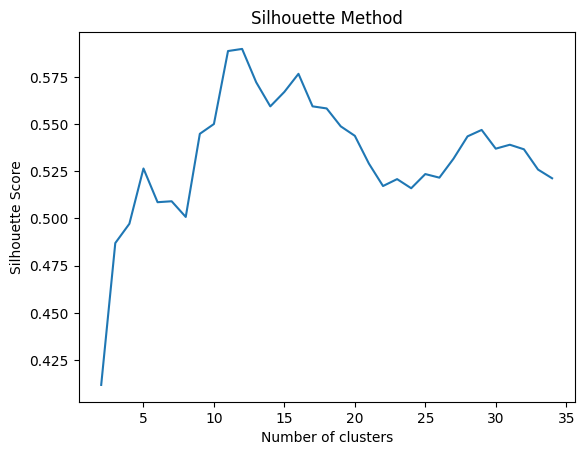

In [22]:
silhouette_scores = []
best = 0
for i in range(2, 35):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=0)
    kmeans.fit(coords)
    score = silhouette_score(coords, kmeans.labels_)
    silhouette_scores.append(score)
    if score > best:
    
        best = score
        best_k = i

print(f"Best number of clusters by Silhouette Score: {best_k} with sihloutte score {best}")
plt.plot(range(2, 35), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

# Hierarchical Cluster Analysis

Try build cluster diagrams like the one in Elman 1990 paper -> look at [- and + in my clusters]

In [145]:
import psycopg2
import json 
import pandas as pd
import generate_data as gd
import sqlalchemy as sa
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import os
import ast, itertools
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

password = os.environ['ML_POSTGRESS_URL'].split(':')[2].split("@")[0]
# host = os.environ['ML_POSTGRESS_HOST']
host = "2m43izca46y.db.cloud.edu.au"
database = "simulation"
engine = sa.create_engine( f"postgresql://max:{password}@{host}" + f"/{database}")
conn = psycopg2.connect(host=host, dbname=database, user='max', password=password)

run_name = "2511028706"	
run_name = "2330035447"	
run_name = "837710893" # 6 Classes Lower acc
run_name = "412560783" # 7 Classes

run_name = "1327087827" # 6 Classes Lower acc
run_name = "3840264976" # 6 Classes Lower acc
run_name = "1049068982"	# 5 Classes
run_name = "4073907221" # 6 Classes Higher acc 



sql_query = f"""
SELECT 
    sims.nd_structure as tree, 
    sims.accuracy as score
FROM 
    simulation_model_registry sims
WHERE
    simulation_id = '{run_name}';
"""
df_all= pd.read_sql(sql_query, conn)
conn.close()
# df_all.describe

/var/folders/h2/7j0s980d2w7951jcy8zc25ww08y435/T/ipykernel_3177/2812686578.py:47: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_all= pd.read_sql(sql_query, conn)


In [146]:
from sklearn import metrics

embeding = "newick"
df = embed_tree(df_all.copy(), embeding)
newicks = df["tree_encoded"]
if embeding == "newick":
    vec = TfidfVectorizer(analyzer="char", ngram_range=(2,4), norm="l2")
    X = vec.fit_transform(newicks)
else:
    X = vec.fit_transform(newicks)

# X = TfidfVectorizer(analyzer="char", ngram_range=(2,4), norm="l2").fit_transform(newicks)
S = cosine_similarity(X)                         # similarity (absolute; no reordering)
D = 1.0 - S                                      # distance for embedding

# MDS: finds 2D coords whose Euclidean distances best match the given distance matrix
# by minimizing sum of squared distance mismatches. `dissimilarity="precomputed"`
# tells it we’re passing D directly.
coords = MDS(n_components=2, dissimilarity="precomputed", random_state=0).fit_transform(D)


/Users/22701987/Documents/code/simulation/venv/lib/python3.10/site-packages/sklearn/manifold/_mds.py:677: FutureWarning: The default value of `n_init` will change from 4 to 1 in 1.9.
  warnings.warn(


Best number of clusters by Silhouette Score: 6 with sihloutte score 0.5558292179884283


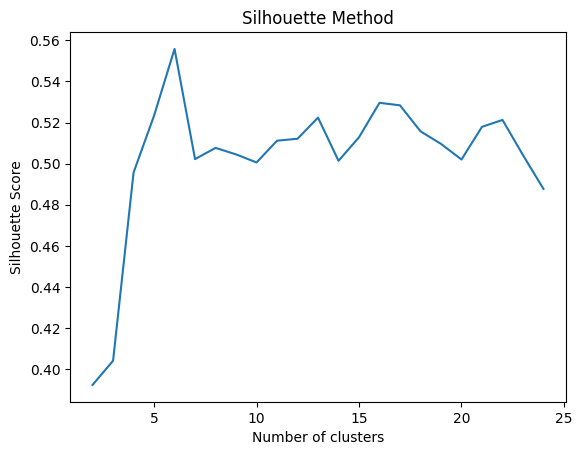

In [245]:
silhouette_scores = []
best = 0
for i in range(2, 25):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=0)
    kmeans.fit(coords)
    score = silhouette_score(coords, kmeans.labels_)
    silhouette_scores.append(score)
    if score > best:
        best = score
        best_k = i

print(f"Best number of clusters by Silhouette Score: {best_k} with sihloutte score {best}")
plt.plot(range(2, 25), silhouette_scores)
plt.title('Silhouette Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [160]:
import numpy as np
# from sklearn.cluster import DBSCAN
from sklearn.cluster import DBSCAN, HDBSCAN, OPTICS

db = DBSCAN(eps=0.02, min_samples=10).fit(coords)
db = OPTICS(max_eps=0.4, metric="cosine").fit(coords)
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)


print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 11
Estimated number of noise points: 34


In [48]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# You already have: X (TF-IDF), coords (2D from MDS), vec, newicks
feature_names = np.array(vec.get_feature_names_out())
labels = np.asarray(newicks)  # sample labels to print (e.g., tree strings)

# --- Pick k (silhouette) or set manually ---
def choose_k(C, ks=range(2, 9), random_state=0):
    best_k, best_s = None, -1
    for k in ks:
        lab = KMeans(n_clusters=k, n_init=10, random_state=random_state).fit_predict(C)
        s = silhouette_score(C, lab)
        if s > best_s:
            best_k, best_s = k, s
    return best_k

k = choose_k(coords)  # or e.g., k = 3

# --- Cluster in the 2-D space ---
km = KMeans(n_clusters=k, n_init=20, random_state=0)
cluster_id = km.fit_predict(coords)

# --- Inside-group explanations ---
X = X.tocsr()  # efficient row slicing
global_mean = X.mean(axis=0).A1
eps = 1e-9     # smoothing for ratios

def cluster_summary(c, topn=10, n_proto=5):
    idx = np.where(cluster_id == c)[0]
    mean_tf = X[idx].mean(axis=0).A1

    # (A) Common terms: largest mean TF-IDF within the cluster
    top_common = mean_tf.argsort()[-topn:][::-1]

    # (B) Enriched terms: inside-vs-corpus (ratio * magnitude for stability)
    enrich_score = ((mean_tf + eps) / (global_mean + eps)) * mean_tf
    top_enriched = enrich_score.argsort()[-topn:][::-1]

    # (C) Prototypes: closest points to the cluster center in 2D coords
    center = km.cluster_centers_[c]
    d = ((coords[idx] - center) ** 2).sum(axis=1)
    proto_idx = idx[np.argsort(d)[:n_proto]]

    return {
        "size": len(idx),
        "top_common_terms": feature_names[top_common].tolist(),
        "top_enriched_terms": feature_names[top_enriched].tolist(),
        "prototypes": labels[proto_idx].tolist(),
    }

summaries = [cluster_summary(c) for c in range(k)]

# --- Compact printout ---
for c, s in enumerate(summaries):
    print(f"Cluster {c} (n={s['size']})")
    print("  common terms:   " + ", ".join(s["top_common_terms"]))
    print("  enriched terms: " + ", ".join(s["top_enriched_terms"]))
    print("  prototypes:     " + " | ".join(s["prototypes"]))
    print()


Cluster 0 (n=343)
  common terms:   group:(0, 1, 2, 4, 5, 6), sz:6|1, sz:1|1, sz:5|1, group:(0, 1, 4, 5, 6), pair:5-6, pair:0-6, pair:1-5, pair:0-5, pair:0-1
  enriched terms: group:(0, 1, 2, 4, 5, 6), split:(0, 1, 2, 4, 5, 6)|(3,), group:(0, 1, 4, 5, 6), sz:6|1, sz:5|1, group:(0, 2, 4, 5, 6), group:(0, 1, 2, 4, 5), group:(0, 1, 5, 6), group:(0, 1, 2, 4, 6), group:(1, 2, 4, 5, 6)
  prototypes:     [((0,), (6,)), ((0, 1, 2, 4, 5, 6), (3,)), ((1, 2, 4, 5), (0, 6)), ((2, 4, 5), (1,)), ((4,), (5,)), ((4, 5), (2,))] | [((0,), (6,)), ((0, 1, 2, 4, 5, 6), (3,)), ((1, 2, 4, 5), (0, 6)), ((2,), (4,)), ((2, 4), (5,)), ((2, 4, 5), (1,))] | [((0,), (2,)), ((0, 1, 2, 4, 5, 6), (3,)), ((0, 2), (5,)), ((0, 2, 5), (1, 4, 6)), ((4,), (6,)), ((4, 6), (1,))] | [((0,), (6,)), ((0, 1, 2, 4, 5, 6), (3,)), ((1, 2, 4), (5,)), ((1, 2, 4, 5), (0, 6)), ((2,), (4,)), ((2, 4), (1,))] | [((0,), (2,)), ((0, 1, 2, 4, 5, 6), (3,)), ((0, 2), (5,)), ((0, 2, 5), (1, 4, 6)), ((1,), (6,)), ((1, 6), (4,))]

Cluster 1 (n=434

In [147]:
# assumes: coords, X (TF-IDF sparse), feat = vec.get_feature_names_out(), newicks
import numpy as np, pandas as pd
from scipy.cluster.hierarchy import linkage, dendrogram, leaves_list, to_tree
from sklearn.feature_selection import chi2
from bokeh.plotting import figure, show
from bokeh.models import Label
from matplotlib.colors import to_hex

# params you can tweak
top_merges, per_side = 4, 4
y_shift = -0.1          # global vertical shift (fraction of max height)
top_k_adjust, top_adjust = 2, -0.015  # extra shift for top-k merges (negative lowers them)

Z = linkage(coords, method="ward")
d = dendrogram(Z, labels=np.asarray(newicks), no_plot=True)
feat = np.array(vec.get_feature_names_out())

p = figure(width=900, height=400, toolbar_location=None)
p.multi_line(d["icoord"], d["dcoord"], line_color=[to_hex(c) for c in d["color_list"]], line_width=1)
p.xaxis.visible = False; p.grid.visible = False; p.outline_line_color = None
p.yaxis.axis_label = "Height (Ward)"

order = leaves_list(Z); xpos = {leaf: 5 + 10*i for i, leaf in enumerate(order)}
n = Z.shape[0] + 1
members = {i: [i] for i in range(n)}
for i,(a,b,_,_) in enumerate(Z):
    a,b=int(a),int(b); members[n+i] = members[a] + members[b]

hmax = float(Z[:,2].max())
tree, nodes = to_tree(Z, rd=True)
internals = sorted((nd for nd in nodes if not nd.is_leaf()), key=lambda nd: nd.dist, reverse=True)[:top_merges]

rows = []
for r, nd in enumerate(internals):
    L = np.array(nd.left.pre_order(lambda x: x.id)); R = np.array(nd.right.pre_order(lambda x: x.id))
    idx = np.r_[L,R]; ybin = np.r_[np.zeros(len(L),int), np.ones(len(R),int)]; Xp = X[idx]
    chi,_ = chi2(Xp, ybin); order_f = chi.argsort()[::-1]
    muL = np.asarray(Xp[:len(L)].mean(axis=0)).ravel(); muR = np.asarray(Xp[len(L):].mean(axis=0)).ravel()
    dlt = muR - muL
    sel = [j for j in order_f if dlt[j] != 0][: 8*per_side]
    Ltok = [f"{feat[j]} ({-dlt[j]:.2g})" for j in sel if dlt[j] < 0][:per_side]
    Rtok = [f"{feat[j]} ({ dlt[j]:.2g})" for j in sel if dlt[j] > 0][:per_side]

    xL = float(np.median([xpos[k] for k in L]))
    xR = float(np.median([xpos[k] for k in R]))
    if abs(xR - xL) < 25: xL -= 19; xR += 9
    ytxt = float(nd.dist) + (y_shift + (top_adjust if r < top_k_adjust else 0)) * hmax

    p.add_layout(Label(x=xL, y=ytxt, text="L\n"+"\n".join(Ltok), text_font_size="7pt", text_align="center",
                       text_color="#0b3d91", background_fill_color="#e8f0ff", background_fill_alpha=1.0,
                       border_line_color="#bcd0ff"))
    p.add_layout(Label(x=xR, y=ytxt, text="R\n"+"\n".join(Rtok), text_font_size="7pt", text_align="center",
                       text_color="#8a1f1f", background_fill_color="#ffecec", background_fill_alpha=1.0,
                       border_line_color="#ffc8c8"))

    rows.append({"height": float(nd.dist), "left_n": len(L), "right_n": len(R),
                 "left_tokens": Ltok, "right_tokens": Rtok, "y_applied": ytxt})

to_html = f"img/{run_name}_{embeding}_hierarchy.html"
output_file(to_html)
save(p)
show(p)

# merge info table
tbl = pd.DataFrame(rows)
with pd.option_context("display.max_colwidth", 100, "display.width", 160):
    print(tbl.to_string(index=False))


   height  left_n  right_n                                         left_tokens                                           right_tokens  y_applied
12.291839     421      524     [),0 (0.11), 0) (0.11), ),0) (0.11), ,0 (0.11)]    [(0 (0.095), (0, (0.095), 0, (0.095), (((0 (0.085)]  10.878277
 9.317784     177      347     [(1 (0.11), 1, (0.11), (1, (0.11), ),(1 (0.09)]     [1) (0.095), ,1) (0.095), ,1 (0.095), 1), (0.083)]   7.904222
 7.332207     180      241   [),1 (0.11), ),1) (0.11), ,1 (0.094), 1) (0.094)]        [(1 (0.11), (1, (0.11), 1, (0.11), (((1 (0.11)]   6.103023
 4.908592     155      192 [2, (0.094), (2, (0.094), (2 (0.094), ),(2 (0.071)] [),2 (0.069), ),2) (0.069), 2), (0.067), ,2), (0.067)]   3.679408
